## Predicting Wine Quality

In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from graphviz import Source
from sklearn.tree import export_graphviz
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

pd.options.display.float_format = '{:,.4f}'.format

wineWhite = pd.read_csv('./processeddata/wine_quality_white.csv', skipinitialspace=True, index_col=0)
wineRed = pd.read_csv('./processeddata/wine_quality_red.csv', skipinitialspace=True, index_col=0)

### Data Preprocessing

In [440]:
wineWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
5,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6


In [441]:
wineWhite.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7
4898,6.0000,0.2100,0.3800,0.8000,0.0200,22.0000,98.0000,0.9894,3.2600,0.3200,11.8000,6


In [442]:
wineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


In [443]:
wineRed.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6
1597,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5
1599,6.0000,0.3100,0.4700,3.6000,0.0670,18.0000,42.0000,0.9955,3.3900,0.6600,11.0000,6


### Shape

In [444]:
wineWhite.shape

(4898, 12)

In [445]:
wineRed.shape

(1599, 12)

### Datatypes

In [446]:
wineWhite.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [447]:
wineRed.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Dropping duplicate rows


In [448]:
duplicate_rows_df = wineRed[wineRed.duplicated()]
duplicate_rows_df.shape

(240, 12)

In [449]:
wineRed.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [450]:
wineRed = wineRed.drop_duplicates()
wineRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.8000,0.6200,0.0800,1.9000,0.0680,28.0000,38.0000,0.9965,3.4200,0.8200,9.5000,6
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5


In [451]:
duplicate_rows_df = wineWhite[wineWhite.duplicated()]
duplicate_rows_df.shape

(937, 12)

In [452]:
wineWhite.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [453]:
wineWhite = wineWhite.drop_duplicates()
wineWhite


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7


### Replace invalid data with NaN

In [454]:
wineRed['fixed acidity'] = wineRed['fixed acidity'].mask(wineRed['fixed acidity'] < 0, np.NaN)

In [455]:
wineWhite['fixed acidity'] = wineWhite['fixed acidity'].mask(wineWhite['fixed acidity'] < 0, np.NaN)

In [456]:
wineRed['volatile acidity'] = wineRed['volatile acidity'].mask(wineRed['volatile acidity'] < 0, np.NaN)
wineWhite['volatile acidity'] = wineWhite['volatile acidity'].mask(wineWhite['volatile acidity'] < 0, np.NaN)

In [457]:
wineRed['citric acid'] = wineRed['citric acid'].mask(wineRed['citric acid'] < 0, np.NaN)
wineWhite['citric acid'] = wineWhite['citric acid'].mask(wineWhite['citric acid'] < 0, np.NaN)

In [458]:
wineRed['residual sugar'] = wineRed['residual sugar'].mask(wineRed['residual sugar'] < 0, np.NaN)
wineWhite['residual sugar'] = wineWhite['residual sugar'].mask(wineWhite['residual sugar'] < 0, np.NaN)

In [459]:
wineRed['chlorides'] = wineRed['chlorides'].mask(wineRed['chlorides'] < 0, np.NaN)
wineWhite['chlorides'] = wineWhite['chlorides'].mask(wineWhite['chlorides'] < 0, np.NaN)

In [460]:
wineRed['free sulfur dioxide'] = wineRed['free sulfur dioxide'].mask(wineRed['free sulfur dioxide'] < 0, np.NaN)
wineWhite['free sulfur dioxide'] = wineWhite['free sulfur dioxide'].mask(wineWhite['free sulfur dioxide'] < 0, np.NaN)

In [461]:
wineRed['total sulfur dioxide'] = wineRed['total sulfur dioxide'].mask(wineRed['total sulfur dioxide'] < 0, np.NaN)
wineWhite['total sulfur dioxide'] = wineWhite['total sulfur dioxide'].mask(wineWhite['total sulfur dioxide'] < 0, np.NaN)

In [462]:
wineRed['density'] = wineRed['density'].mask(wineRed['density'] < 0, np.NaN)
wineWhite['density'] = wineWhite['density'].mask(wineWhite['density'] < 0, np.NaN)

In [463]:
wineRed['pH'] = wineRed['pH'].mask(wineRed['pH'] < 0, np.NaN)
wineRed['pH'] = wineRed['pH'].mask(wineRed['pH'] > 14, np.NaN)
wineWhite['pH'] = wineWhite['pH'].mask(wineWhite['pH'] < 0, np.NaN)
wineWhite['pH'] = wineWhite['pH'].mask(wineWhite['pH'] > 14, np.NaN)

In [464]:
wineRed['sulphates'] = wineRed['sulphates'].mask(wineRed['sulphates'] < 0, np.NaN)
wineWhite['sulphates'] = wineWhite['sulphates'].mask(wineWhite['sulphates'] < 0, np.NaN)

In [465]:
wineRed['alcohol'] = wineRed['alcohol'].mask(wineRed['alcohol'] < 0, np.NaN)
wineWhite['alcohol'] = wineWhite['alcohol'].mask(wineWhite['alcohol'] < 0, np.NaN)

In [466]:
wineRed['quality'] = wineRed['quality'].mask(wineRed['quality'] < 0, np.NaN)
wineRed['quality'] = wineRed['quality'].mask(wineRed['quality'] > 10, np.NaN)
wineWhite['quality'] = wineWhite['quality'].mask(wineWhite['quality'] < 0, np.NaN)
wineWhite['quality'] = wineWhite['quality'].mask(wineWhite['quality'] > 10, np.NaN)

### Analizing Missing Values

In [467]:
wineRed.isnull().values.any()

False

In [468]:
wineWhite.isnull().values.any()

False

### Normalize Data

In [469]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_Red = scaler.fit_transform(wineRed)

In [470]:
print('means : ', data_scaled_Red.mean(axis=0))
print('std : ', data_scaled_Red.std(axis=0))

means :  [0.32837133 0.28046408 0.2723326  0.11119175 0.12708451 0.20976484
 0.1442614  0.4874411  0.44865087 0.1968293  0.31266391 0.52465048]
std :  [0.15365935 0.12531778 0.19546459 0.09259015 0.08240182 0.1470905
 0.11800937 0.13716809 0.12203091 0.10215814 0.16641035 0.16465499]


In [471]:
print('Min : ', data_scaled_Red.min(axis=0))
print('Max : ', data_scaled_Red.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [472]:
#print('Quartile : ', data_scaled_Red.quantile([0.25,0.5,0.75]))

In [473]:
data_scaled_White = scaler.fit_transform(wineWhite)
########
data_scaled_White

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.26744186, 0.12903226,
        0.5       ],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.31395349, 0.24193548,
        0.5       ],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.25581395, 0.33870968,
        0.5       ],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.27906977, 0.22580645,
        0.5       ],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.18604651, 0.77419355,
        0.66666667],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.11627907, 0.61290323,
        0.5       ]])

In [474]:
print('means : ', data_scaled_White.mean(axis=0))
print('std : ', data_scaled_White.std(axis=0))

means :  [0.29224482 0.19660563 0.20140496 0.08151564 0.10951061 0.11459641
 0.29743274 0.12877444 0.43223474 0.31436154 0.41763837 0.47580577]
std :  [0.08334138 0.10139611 0.07375339 0.07455571 0.0685454  0.05995766
 0.1000548  0.05599054 0.13775131 0.1319866  0.19627785 0.14842837]


In [475]:
print('Min : ', data_scaled_White.min(axis=0))
print('Max : ', data_scaled_White.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [476]:
#print('Quartile : ', data_scaled_White.quantile([0.25,0.5,0.75], axis=0))

In [477]:
data_scaled_White = pd.DataFrame({'fixed acidity': wineWhite.iloc[:,0], 'volatile acidity': wineWhite.iloc[:,1], 'citric acid': wineWhite.iloc[:,2], 'residual sugar': wineWhite.iloc[:,3], 'chlorides': wineWhite.iloc[:,4],'free sulfur dioxide': wineWhite.iloc[:,5], 'total sulfur dioxide': wineWhite.iloc[:,6], 'density': wineWhite.iloc[:,7], 'pH': wineWhite.iloc[:,8], 'sulphates': wineWhite.iloc[:,9], 'alcohol': wineWhite.iloc[:,10], 'quality':wineWhite.iloc[:,11]})

In [478]:
data_scaled_White.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6


In [479]:
data_scaled_Red = pd.DataFrame({'fixed acidity': wineRed.iloc[:,0], 'volatile acidity': wineRed.iloc[:,1], 'citric acid': wineRed.iloc[:,2], 'residual sugar': wineRed.iloc[:,3], 'chlorides': wineRed.iloc[:,4],'free sulfur dioxide': wineRed.iloc[:,5], 'total sulfur dioxide': wineRed.iloc[:,6], 'density': wineRed.iloc[:,7], 'pH': wineRed.iloc[:,8], 'sulphates': wineRed.iloc[:,9], 'alcohol': wineRed.iloc[:,10], 'quality':wineRed.iloc[:,11]})

In [480]:
data_scaled_Red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5


### Classify quality into (High, Medium, Low)

In [481]:
wineWhite["quality"].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [482]:
wineWhite['Categorical Quality'] = data_scaled_White['quality']

In [483]:
wineWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6,6
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7,7


In [484]:
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Medium", 6: "High",
                                  7: "High", 8: "High", 9:"High"}}

In [485]:
wineWhite = wineWhite.replace(cleanup_nums)
 

In [486]:
wineWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6,High
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6,High
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6,High
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6,High
7,6.2000,0.3200,0.1600,7.0000,0.0450,30.0000,136.0000,0.9949,3.1800,0.4700,9.6000,6,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6,High
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5,Medium
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6,High
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7,High


In [487]:
wineRed["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [488]:
wineRed['Categorical Quality'] = wineRed['quality']

In [489]:
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Medium", 6: "High",
                                  7: "High", 8: "High"}}

In [490]:
wineRed = wineRed.replace(cleanup_nums)

In [491]:
wineRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5,Medium
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5,Medium
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5,Medium
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6,High
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.8000,0.6200,0.0800,1.9000,0.0680,28.0000,38.0000,0.9965,3.4200,0.8200,9.5000,6,High
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5,Medium
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6,High
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5,Medium


In [492]:
wineRed["Categorical Quality"].value_counts()

High      719
Medium    577
Low        63
Name: Categorical Quality, dtype: int64

### Save Changes to Dataset

In [493]:
wineWhite.to_csv('./processeddata/WhiteWine.csv')

In [494]:
wineRed.to_csv('./processeddata/RedWine.csv')

### Central Tendency and Dispersion

In [495]:
wineRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000","1,359.0000"
mean,8.3106,0.5295,0.2723,2.5234,0.0881,15.8933,46.8260,0.9967,3.3098,0.6587,10.4323,5.6233
std,1.7370,0.1830,0.1955,1.3523,0.0494,10.4473,33.4089,0.0019,0.1550,0.1707,1.0821,0.8236
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9967,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4300,2.6000,0.0910,21.0000,63.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


In [496]:
wineWhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000","3,961.0000"
mean,6.8393,0.2805,0.3343,5.9148,0.0459,34.8892,137.1935,0.9938,3.1955,0.4904,10.5894,5.8548
std,0.8669,0.1034,0.1224,4.8616,0.0231,17.2100,43.1291,0.0029,0.1515,0.1135,1.2171,0.8907
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.6000,0.0350,23.0000,106.0000,0.9916,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,4.7000,0.0420,33.0000,133.0000,0.9935,3.1800,0.4800,10.4000,6.0000
75%,7.3000,0.3300,0.3900,8.9000,0.0500,45.0000,166.0000,0.9957,3.2900,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000


### Boxplot

#### White Wine

In [497]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
# ax1.boxplot(data_scaled_White['fixed acidity'])
# ax1.set_xlabel('Fixed Acidity')
# ax2.boxplot(data_scaled_White['volatile acidity'])
# ax2.set_xlabel('Volatile Acidity')
# ax3.boxplot(data_scaled_White['citric acid'])
# ax3.set_xlabel('Citric Acid')
# ax4.boxplot(data_scaled_White['residual sugar'])
# ax4.set_xlabel('Residual Sugar')
# plt.show()

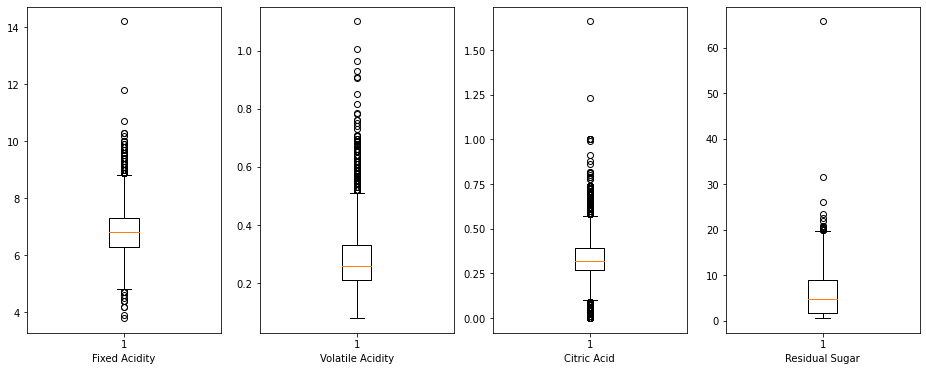

In [498]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.boxplot(wineWhite['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.boxplot(wineWhite['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.boxplot(wineWhite['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.boxplot(wineWhite['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

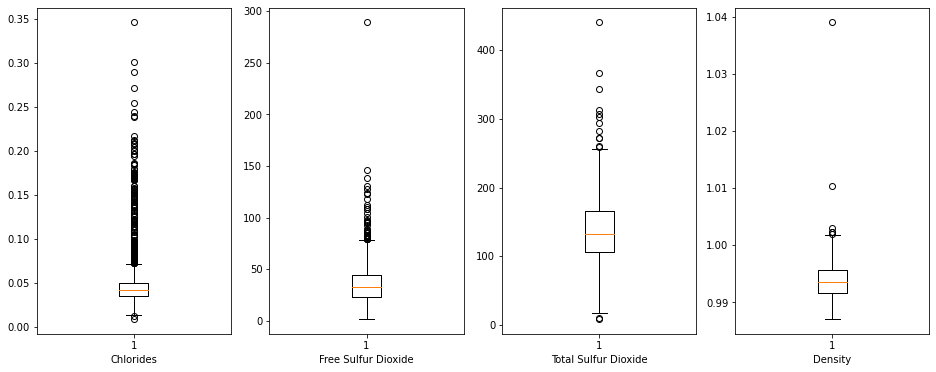

In [499]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.boxplot(wineWhite['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.boxplot(wineWhite['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.boxplot(wineWhite['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.boxplot(wineWhite['density'])
ax8.set_xlabel('Density')
plt.show()

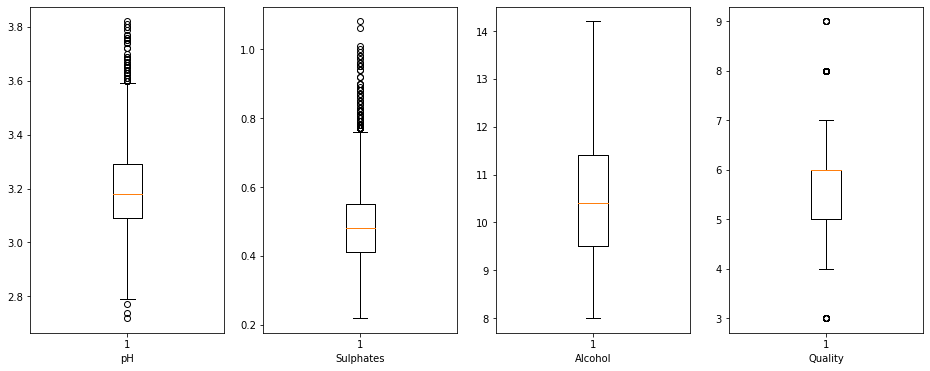

In [500]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.boxplot(wineWhite['pH'])
ax9.set_xlabel('pH')
ax10.boxplot(wineWhite['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.boxplot(wineWhite['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.boxplot(wineWhite['quality'])
ax12.set_xlabel('Quality')
plt.show()

#### Red Wine

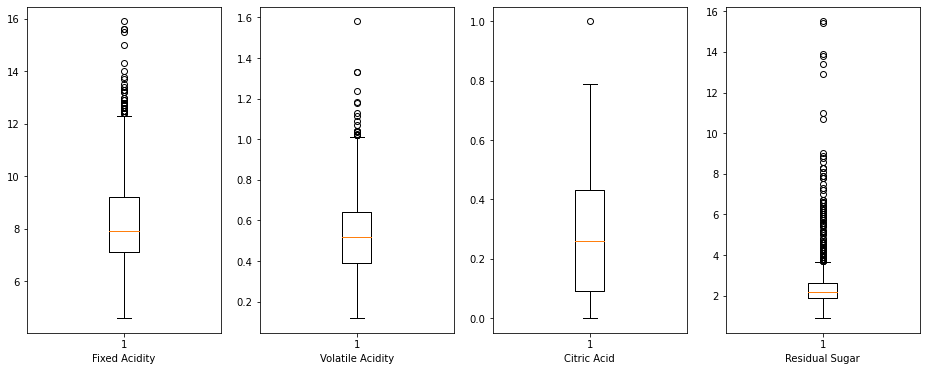

In [501]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.boxplot(wineRed['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.boxplot(wineRed['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.boxplot(wineRed['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.boxplot(wineRed['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

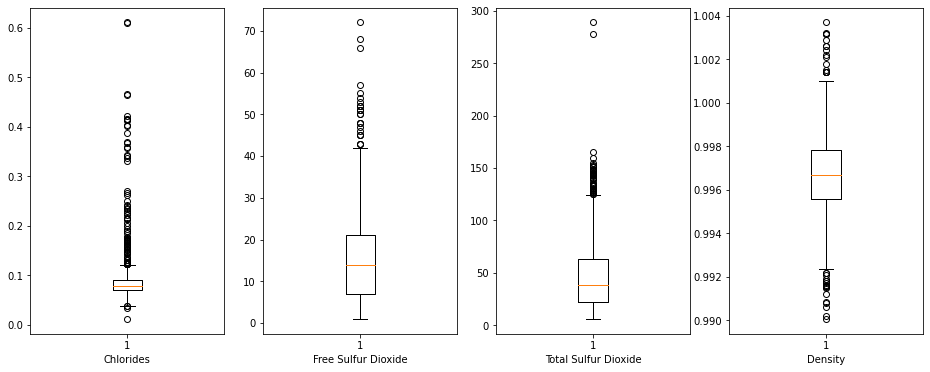

In [502]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.boxplot(wineRed['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.boxplot(wineRed['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.boxplot(wineRed['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.boxplot(wineRed['density'])
ax8.set_xlabel('Density')
plt.show()

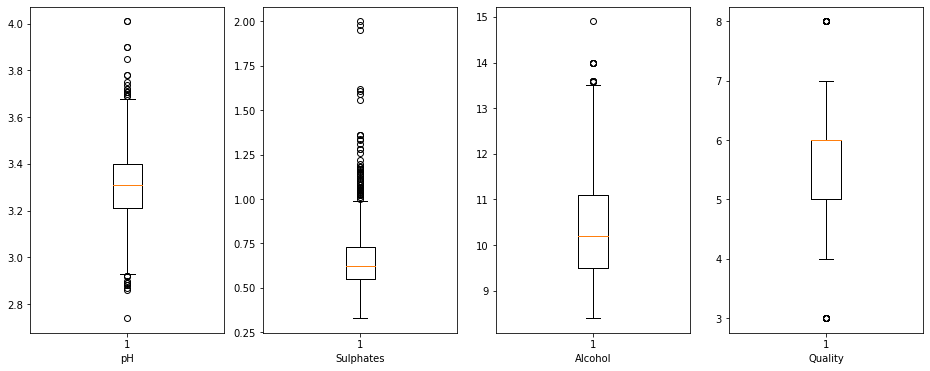

In [503]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.boxplot(wineRed['pH'])
ax9.set_xlabel('pH')
ax10.boxplot(wineRed['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.boxplot(wineRed['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.boxplot(wineRed['quality'])
ax12.set_xlabel('Quality')
plt.show()

### Histogram

#### White Wine

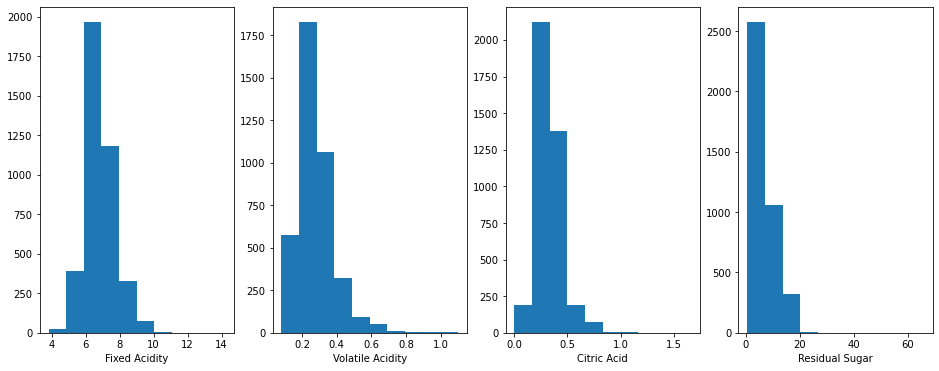

In [504]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.hist(wineWhite['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.hist(wineWhite['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.hist(wineWhite['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.hist(wineWhite['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

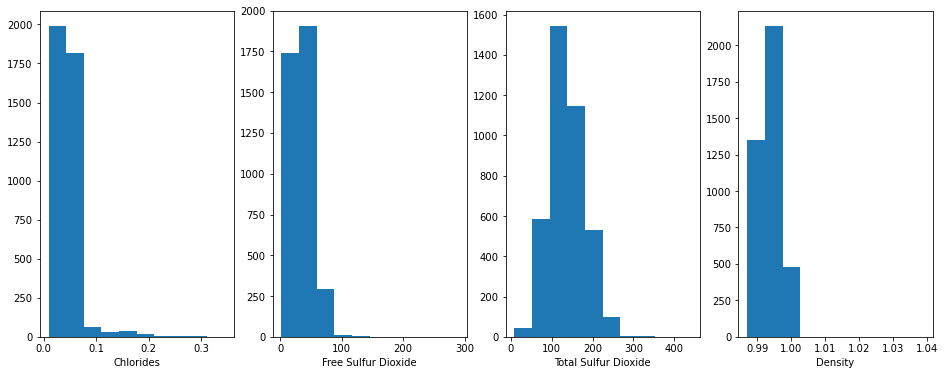

In [505]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.hist(wineWhite['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.hist(wineWhite['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.hist(wineWhite['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.hist(wineWhite['density'])
ax8.set_xlabel('Density')
plt.show()

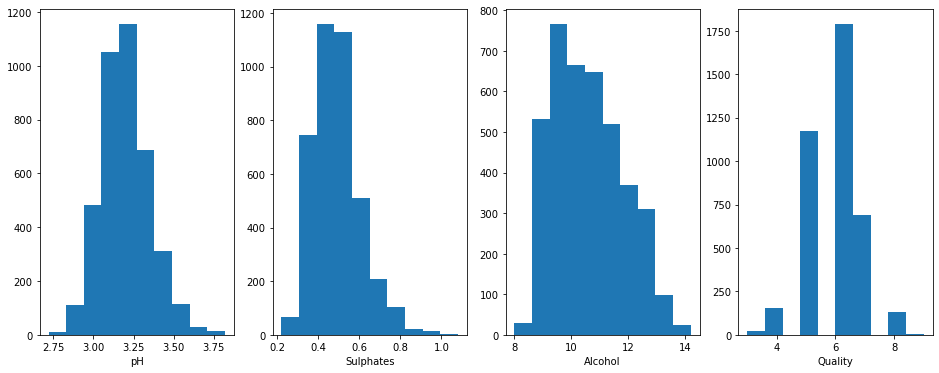

In [506]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.hist(wineWhite['pH'])
ax9.set_xlabel('pH')
ax10.hist(wineWhite['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.hist(wineWhite['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.hist(wineWhite['quality'])
ax12.set_xlabel('Quality')
plt.show()

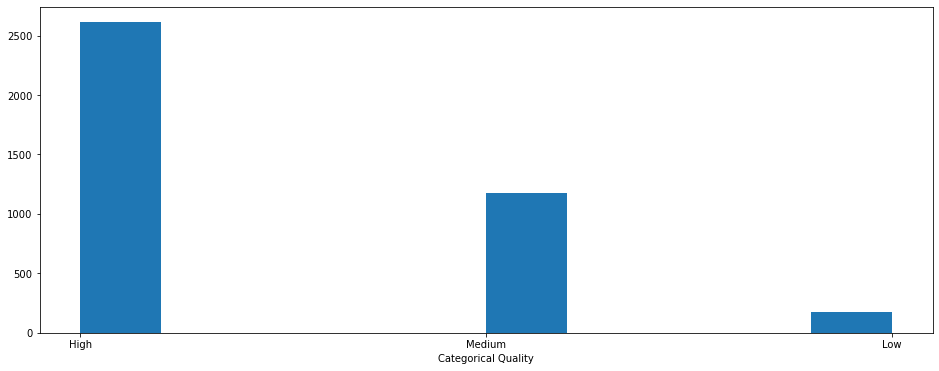

In [507]:
fig, ax13 = plt.subplots(1, 1, figsize=[16, 6])
ax13.hist(wineWhite['Categorical Quality'])
ax13.set_xlabel('Categorical Quality')
plt.show()

#### Red Wine

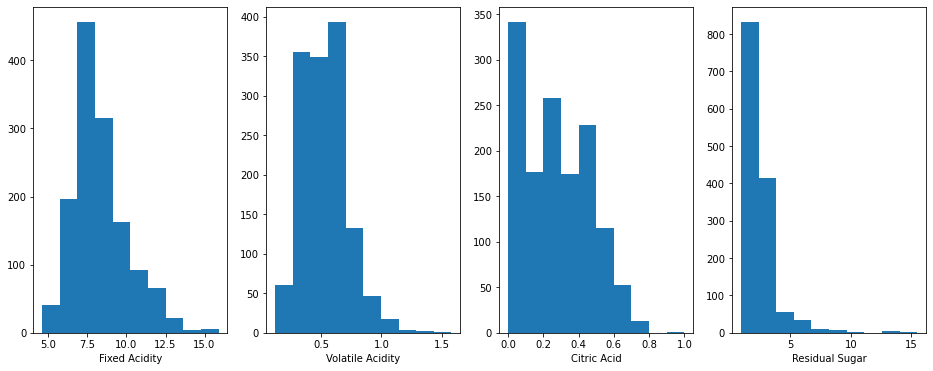

In [508]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.hist(wineRed['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.hist(wineRed['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.hist(wineRed['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.hist(wineRed['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

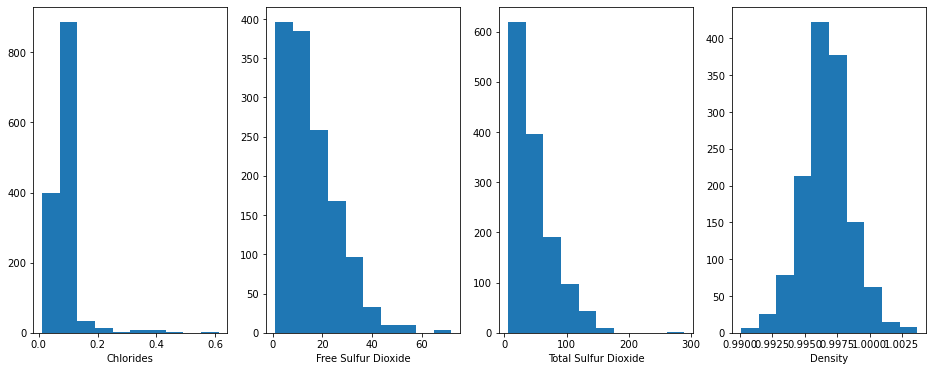

In [509]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.hist(wineRed['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.hist(wineRed['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.hist(wineRed['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.hist(wineRed['density'])
ax8.set_xlabel('Density')
plt.show()

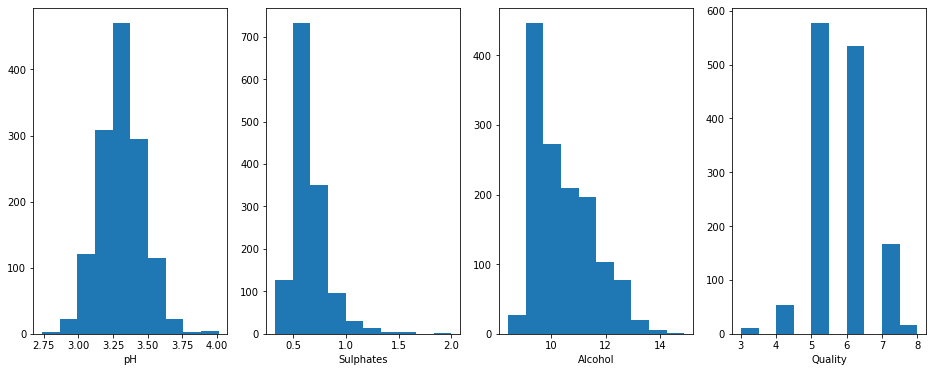

In [510]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.hist(wineRed['pH'])
ax9.set_xlabel('pH')
ax10.hist(wineRed['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.hist(wineRed['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.hist(wineRed['quality'])
ax12.set_xlabel('Quality')
plt.show()

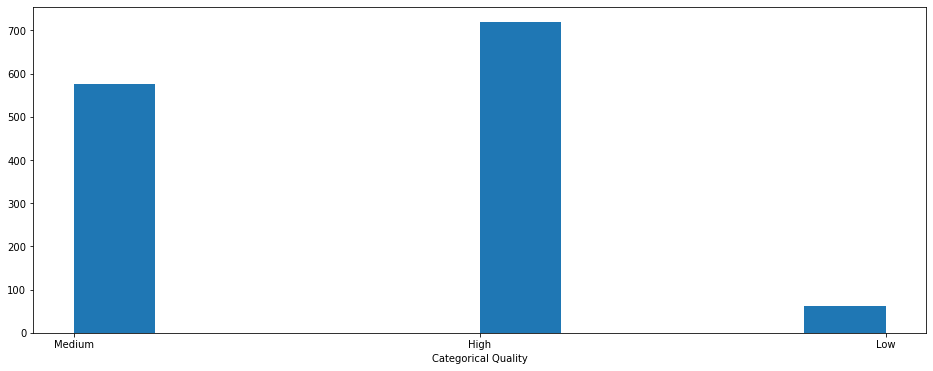

In [511]:
fig, ax13 = plt.subplots(1, 1, figsize=[16, 6])
ax13.hist(wineRed['Categorical Quality'])
ax13.set_xlabel('Categorical Quality')
plt.show()

### EDA

In [512]:
wineRed.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.2551,0.6674,0.1110,0.0859,-0.1406,-0.1038,0.6702,-0.6867,0.1903,-0.0616,0.1190
volatile acidity,-0.2551,1.0000,-0.5512,-0.0024,0.0552,-0.0209,0.0717,0.0239,0.2471,-0.2569,-0.1978,-0.3952
citric acid,0.6674,-0.5512,1.0000,0.1439,0.2102,-0.0480,0.0474,0.3580,-0.5503,0.3261,0.1051,0.2281
residual sugar,0.1110,-0.0024,0.1439,1.0000,0.0267,0.1605,0.2010,0.3245,-0.0831,-0.0118,0.0633,0.0136
chlorides,0.0859,0.0552,0.2102,0.0267,1.0000,0.0007,0.0458,0.1936,-0.2709,0.3946,-0.2238,-0.1310
free sulfur dioxide,-0.1406,-0.0209,-0.0480,0.1605,0.0007,1.0000,0.6672,-0.0181,0.0566,0.0541,-0.0801,-0.0505
total sulfur dioxide,-0.1038,0.0717,0.0474,0.2010,0.0458,0.6672,1.0000,0.0781,-0.0793,0.0353,-0.2178,-0.1779
density,0.6702,0.0239,0.3580,0.3245,0.1936,-0.0181,0.0781,1.0000,-0.3556,0.1460,-0.5050,-0.1843
pH,-0.6867,0.2471,-0.5503,-0.0831,-0.2709,0.0566,-0.0793,-0.3556,1.0000,-0.2141,0.2134,-0.0552
sulphates,0.1903,-0.2569,0.3261,-0.0118,0.3946,0.0541,0.0353,0.1460,-0.2141,1.0000,0.0916,0.2488


In [513]:
wineWhite.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.0192,0.2990,0.0836,0.0240,-0.0584,0.0824,0.2661,-0.4313,-0.0175,-0.1108,-0.1246
volatile acidity,-0.0192,1.0000,-0.1632,0.0983,0.0863,-0.1025,0.1023,0.0606,-0.0470,-0.0212,0.0468,-0.1907
citric acid,0.2990,-0.1632,1.0000,0.1063,0.1326,0.0917,0.1228,0.1601,-0.1830,0.0494,-0.0765,0.0071
residual sugar,0.0836,0.0983,0.1063,1.0000,0.0761,0.3068,0.4096,0.8205,-0.1660,-0.0205,-0.3982,-0.1173
chlorides,0.0240,0.0863,0.1326,0.0761,1.0000,0.1013,0.1911,0.2531,-0.0906,0.0179,-0.3569,-0.2177
free sulfur dioxide,-0.0584,-0.1025,0.0917,0.3068,0.1013,1.0000,0.6194,0.2946,-0.0077,0.0379,-0.2518,0.0105
total sulfur dioxide,0.0824,0.1023,0.1228,0.4096,0.1911,0.6194,1.0000,0.5369,0.0082,0.1365,-0.4466,-0.1834
density,0.2661,0.0606,0.1601,0.8205,0.2531,0.2946,0.5369,1.0000,-0.0637,0.0820,-0.7602,-0.3378
pH,-0.4313,-0.0470,-0.1830,-0.1660,-0.0906,-0.0077,0.0082,-0.0637,1.0000,0.1424,0.0931,0.1238
sulphates,-0.0175,-0.0212,0.0494,-0.0205,0.0179,0.0379,0.1365,0.0820,0.1424,1.0000,-0.0228,0.0532


In [514]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(12, 12))
corr = wineRed.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [515]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(12, 12))
corr = wineWhite.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


### Quality vs Alcohol Scatterplot

Text(0.5, 1.0, 'Quality vs Alcohol Red Wine')

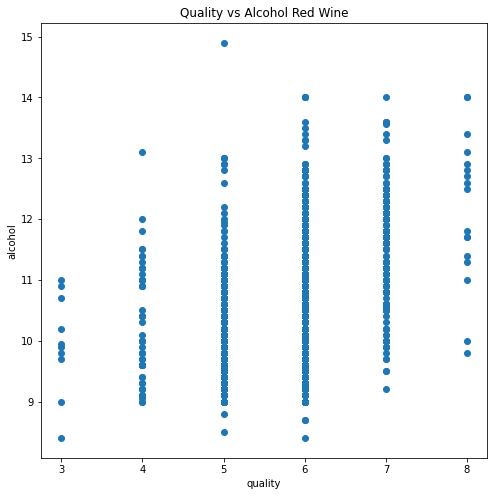

In [516]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['quality'], wineRed['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('quality')
plt.title('Quality vs Alcohol Red Wine')

Text(0.5, 1.0, 'Quality vs Alcohol White Wine')

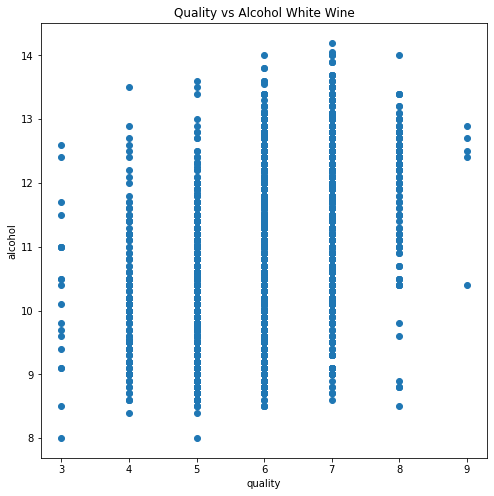

In [517]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['quality'], wineWhite['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('quality')
plt.title('Quality vs Alcohol White Wine')

### Quality vs Volatile acidity Scatterplot

Text(0.5, 1.0, 'Quality vs Volatile Acidity Red Wine')

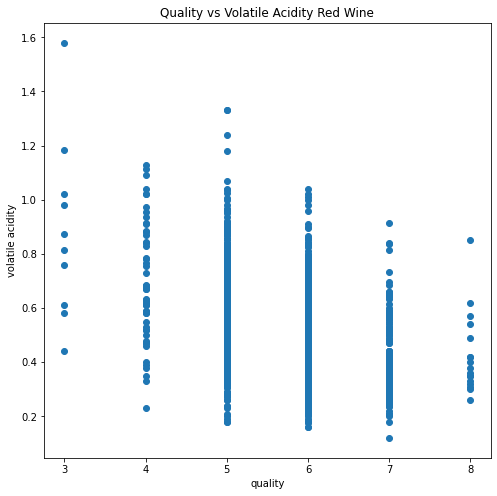

In [518]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['quality'], wineRed['volatile acidity'])
plt.ylabel('volatile acidity')
plt.xlabel('quality')
plt.title('Quality vs Volatile Acidity Red Wine')

Text(0.5, 1.0, 'Quality vs Volatile Acidity White Wine')

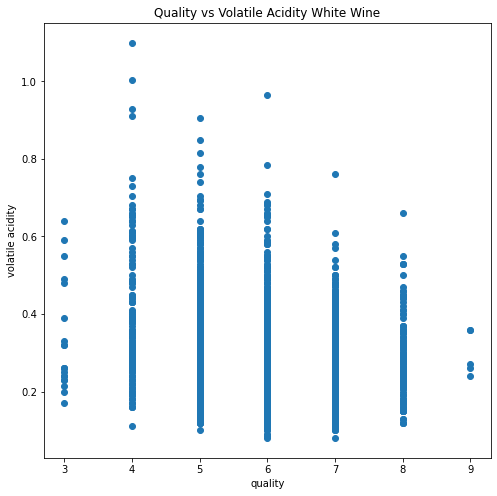

In [519]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['quality'], wineWhite['volatile acidity'])
plt.ylabel('volatile acidity')
plt.xlabel('quality')
plt.title('Quality vs Volatile Acidity White Wine')

### Quality vs Density Scatterplot

Text(0.5, 1.0, 'Quality vs Density White Wine')

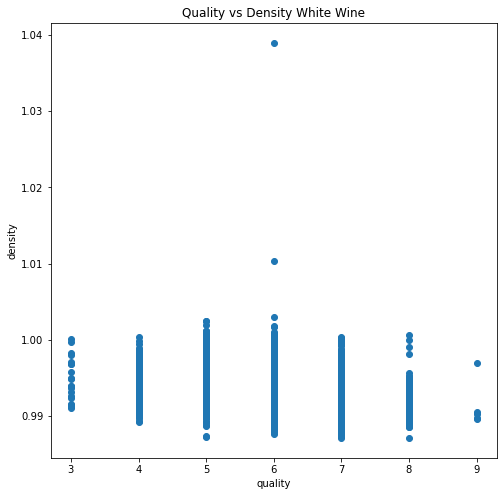

In [520]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['quality'], wineWhite['density'])
plt.ylabel('density')
plt.xlabel('quality')
plt.title('Quality vs Density White Wine')

Text(0.5, 1.0, 'Quality vs Density Red Wine')

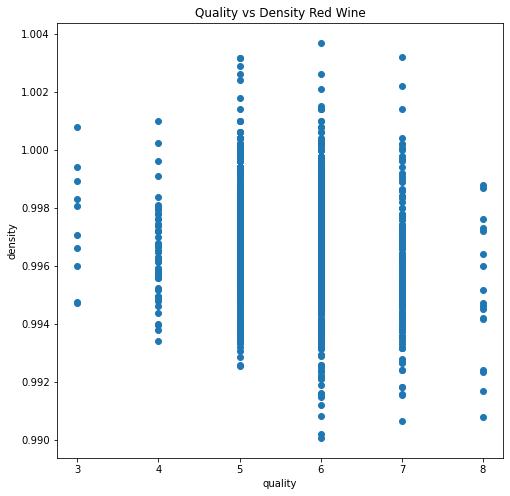

In [521]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['quality'], wineRed['density'])
plt.ylabel('density')
plt.xlabel('quality')
plt.title('Quality vs Density Red Wine')

### Density with Residual Sugar

[]

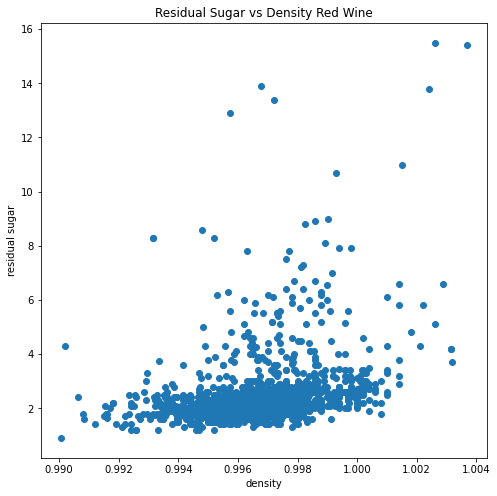

In [522]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['density'], wineRed['residual sugar'])
plt.ylabel('residual sugar')
plt.xlabel('density')
plt.title('Residual Sugar vs Density Red Wine')

plt.plot()

Text(0.5, 1.0, 'Residual Sugar vs Density White Wine')

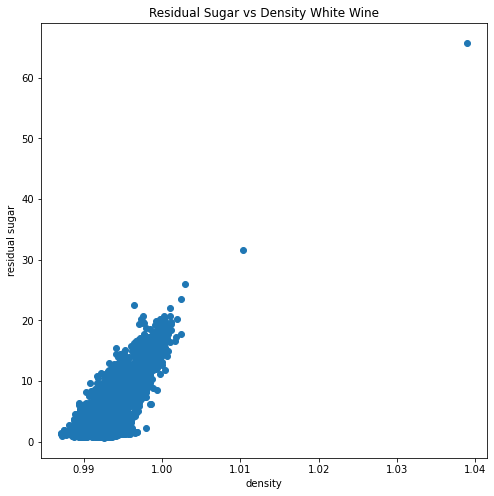

In [523]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['density'], wineWhite['residual sugar'])
plt.ylabel('residual sugar')
plt.xlabel('density')
plt.title('Residual Sugar vs Density White Wine')

### Alcohol vs Density

Text(0.5, 1.0, 'Alcohol vs Density White Wine')

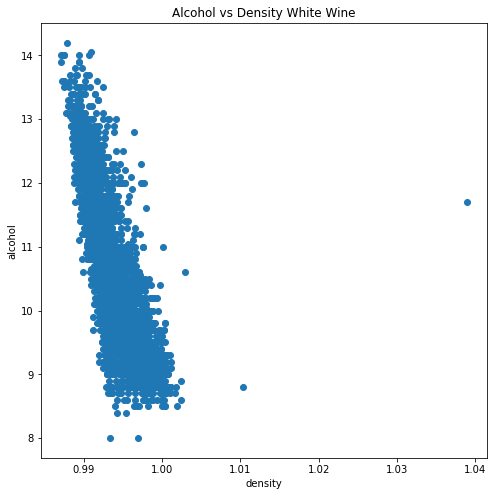

In [524]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['density'], wineWhite['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('density')
plt.title('Alcohol vs Density White Wine')

Text(0.5, 1.0, 'Alcohol vs Density Red Wine')

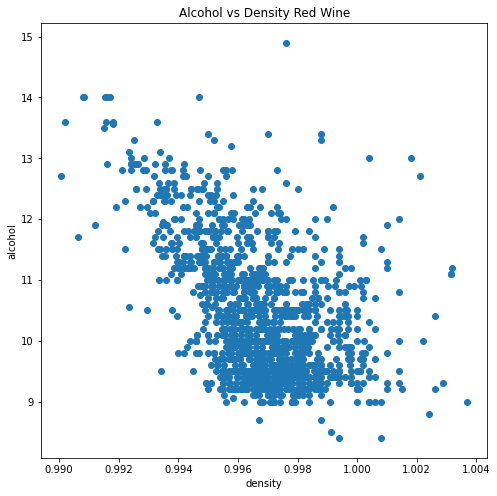

In [525]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['density'], wineRed['alcohol'])
plt.ylabel('alcohol')
plt.xlabel('density')
plt.title('Alcohol vs Density Red Wine')

### Fixed Acidity vs Density

Text(0.5, 1.0, 'Fixed Acidity vs Density Red Wine')

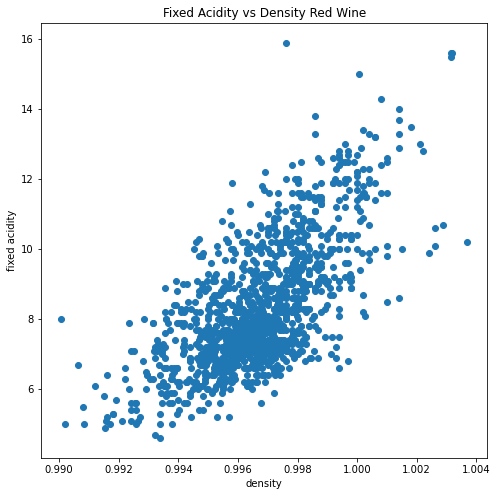

In [526]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['density'], wineRed['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('density')
plt.title('Fixed Acidity vs Density Red Wine')

Text(0.5, 1.0, 'Fixed Acidity vs Density White Wine')

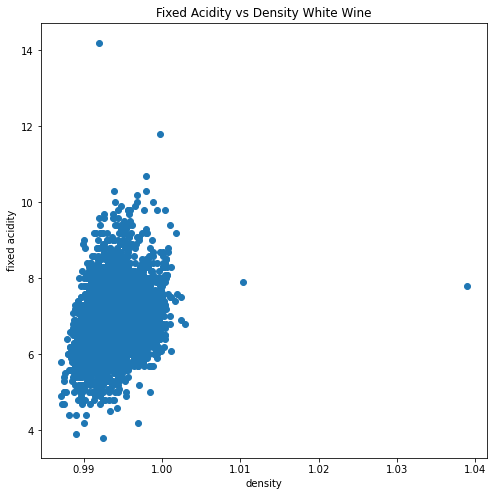

In [527]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['density'], wineWhite['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('density')
plt.title('Fixed Acidity vs Density White Wine')

### Citric Acid vs Fixed Acidity 

Text(0.5, 1.0, 'Fixed Acidity vs Citric Acid Red Wine')

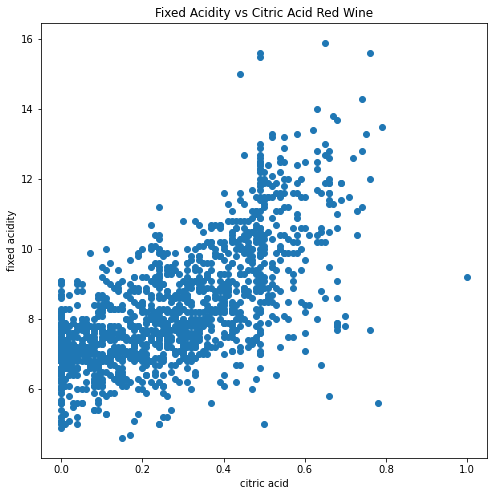

In [528]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['citric acid'], wineRed['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('citric acid')
plt.title('Fixed Acidity vs Citric Acid Red Wine')

Text(0.5, 1.0, 'Fixed Acidity vs Citric Acid White Wine')

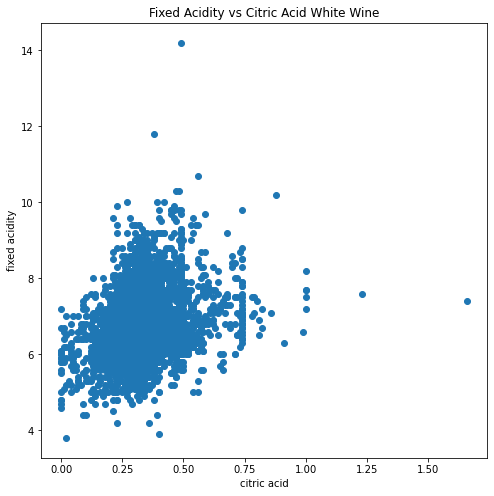

In [529]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['citric acid'], wineWhite['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('citric acid')
plt.title('Fixed Acidity vs Citric Acid White Wine')

### pH vs Fixed Acidity

Text(0.5, 1.0, 'Fixed Acidity vs pH White Wine')

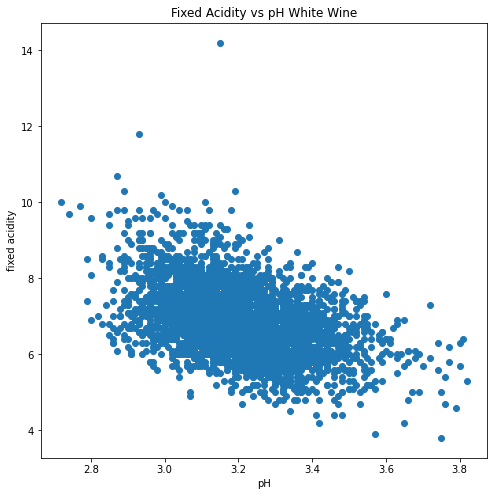

In [530]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineWhite['pH'], wineWhite['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('pH')
plt.title('Fixed Acidity vs pH White Wine')

Text(0.5, 1.0, 'Fixed Acidity vs pH Red Wine')

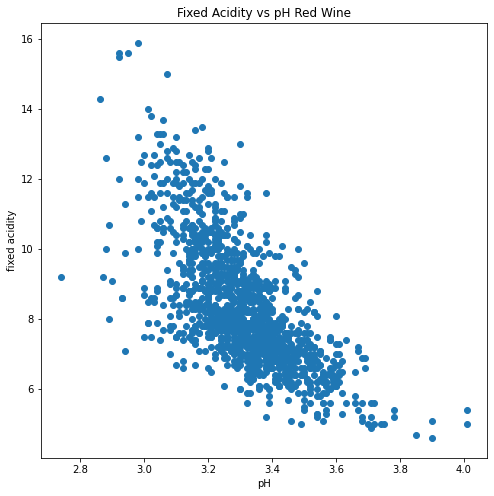

In [531]:
fig, a1 = plt.subplots(1, 1, figsize=[8, 8])

a1.scatter(wineRed['pH'], wineRed['fixed acidity'])
plt.ylabel('fixed acidity')
plt.xlabel('pH')
plt.title('Fixed Acidity vs pH Red Wine')

### K-cross validation with varying sizes of training dataset


### K-Cross Validation with Validation Set

In [532]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [533]:
X_wineWhite_help = wineWhite.loc[:, wineWhite.columns != "Categorical Quality"]
X_wineWhite = X_wineWhite_help.loc[:, X_wineWhite_help.columns != "quality"]
#y_wineWhite = wineWhite["quality"]
y_wineWhite = wineWhite["Categorical Quality"]

In [534]:
X_wineRed_help = wineRed.loc[:, wineRed.columns != "Categorical Quality"]
X_wineRed = X_wineRed_help.loc[:, X_wineRed_help.columns != "quality"]
#y_wineRed = wineRed["quality"]
y_wineRed = wineRed["Categorical Quality"]

### Decision Tree

In [535]:
setCriterion = ['entropy','gini']

In [536]:
def decisionTree_(X_train, X_test, y_train, y_test, Criterion_, max_depth_):
    decisionTree = DecisionTreeClassifier(criterion = Criterion_, max_depth=max_depth_); #max_depth=10, criterion="gini", random_state=42);
    decisionTree.fit(X_train, y_train)
    return decisionTree

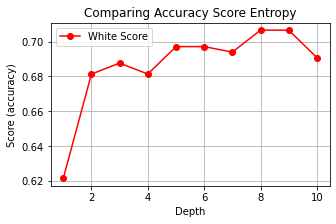

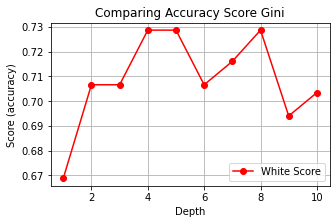

In [537]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10, random_state=None, shuffle=True)

accuracy_entropy = []
accuracy_gini = []

X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, 
                                                                                                test_size=0.2)

for train_index, test_index in kf.split(X_wineWhite_train):

    X_train, X_test_val = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train, y_test_val = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]

    for j in range(1,11):

        decisionTreeEntropy = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[0], j)
        decisionTreeEntropy.fit(X_train, y_train)

        y_pred = decisionTreeEntropy.predict(X_test_val)
        confusion_mat = confusion_matrix(y_test_val, y_pred)

        # Print classification report
        #target_names_white = ['Low', 'Medium', 'High']

        # you can access each class's metrics from result_metrics
        result_dict = classification_report(y_test_val, y_pred, output_dict=True)


        accuracy_entropy.append(['depth: {:.2f}'.format(j), result_dict['accuracy']])

    for j in range(1,11):

        decisionTreeGini = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[1], j)
        decisionTreeGini.fit(X_train, y_train)

        y_pred = decisionTreeGini.predict(X_test_val)
        confusion_mat = confusion_matrix(y_test_val, y_pred)

        # Print classification report
        #target_names_white = ['Low', 'Medium', 'High']

        # you can access each class's metrics from result_metrics
        result_dict = classification_report(y_test_val, y_pred, output_dict=True)


        accuracy_gini.append(['depth: {:.2f}'.format(j), result_dict['accuracy']])


# Plot learning curve entropy

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_title('Comparing Accuracy Score Entropy')
ax.set_xlabel("Depth")
ax.set_ylabel("Score (accuracy)")
ax.grid()

Depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = []

for j in Depth:
    accuracy_list.append(accuracy_entropy[j-1][1])

ax.plot(Depth, accuracy_list, 'o-', color="r", label="White Score")
ax.legend(loc="best")
plt.show() 

accuracy_entropy = []
accuracy_list = []

# Plot learning curve gini

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_title('Comparing Accuracy Score Gini')
ax.set_xlabel("Depth")
ax.set_ylabel("Score (accuracy)")
ax.grid()

Depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = []

for j in Depth:
    accuracy_list.append(accuracy_gini[j-1][1])

ax.plot(Depth, accuracy_list, 'o-', color="r", label="White Score")
ax.legend(loc="best")
plt.show() 

accuracy_entropy = []
accuracy_list = []


# Best acurracy at depth of 3 Entropy

        

In [540]:
decisionTreeEntropy = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[0], 8)

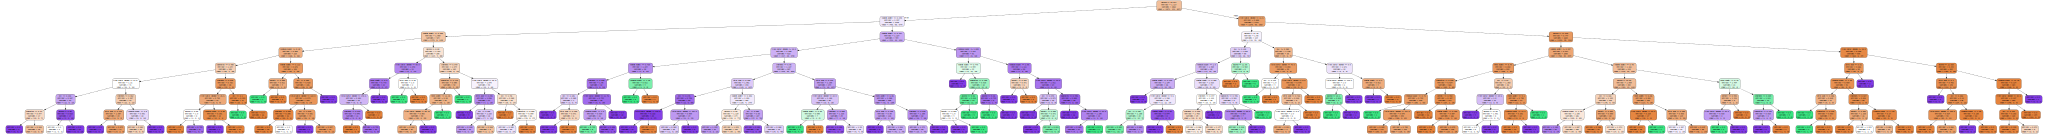

In [541]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeEntropy,
        out_file=os.path.join(IMAGES_PATH, "entropy_white_tree.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "entropy_white_tree.dot"))

In [545]:
decisionTreeGini = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[1], 4)


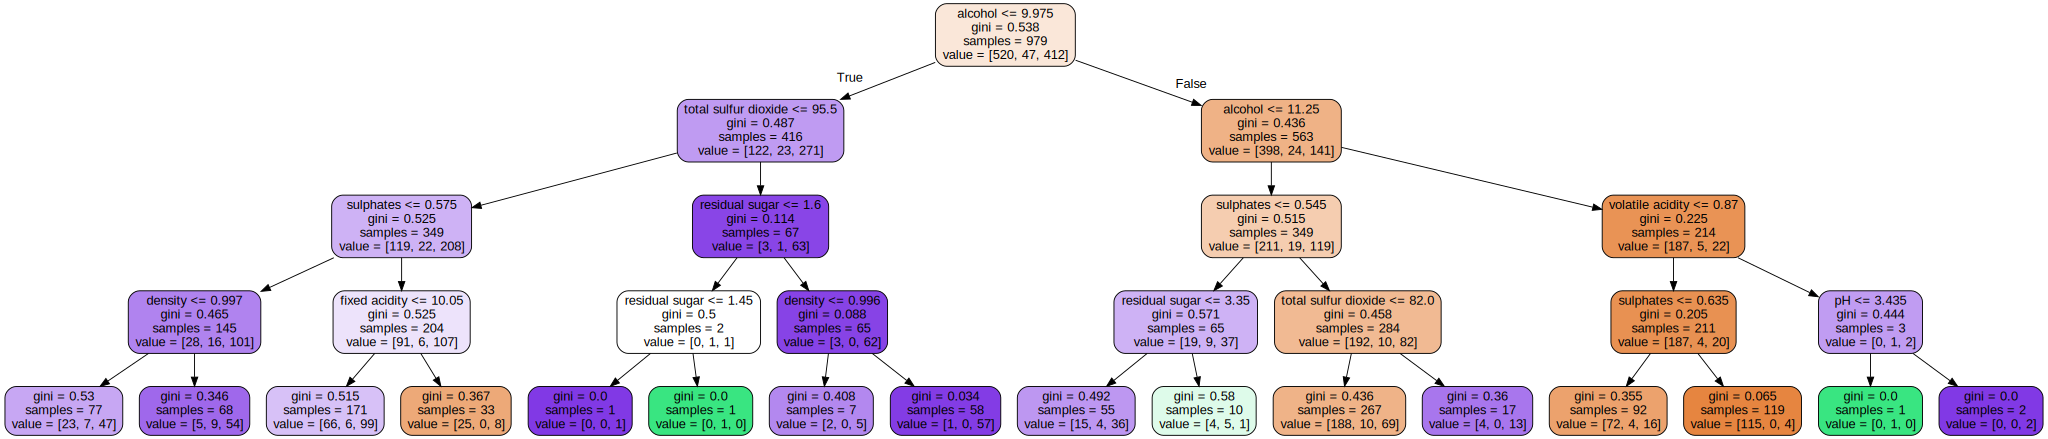

In [546]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeGini,
        out_file=os.path.join(IMAGES_PATH, "entropy_white_tree.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "entropy_white_tree.dot"))

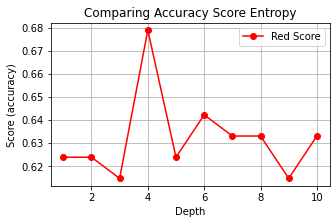

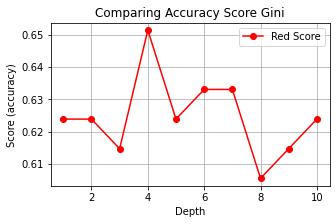

In [542]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# kf = KFold(n_splits=10, random_state=None, shuffle=True)

accuracy_entropy = []
accuracy_gini = []


X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, 
                                                                                            test_size=.2)

for train_index, test_index in kf.split(X_wineRed_train):

    X_train, X_test_val = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train, y_test_val = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]

    for j in range(1,11):

        decisionTreeEntropy = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[0], j)
        decisionTreeEntropy.fit(X_train, y_train)

        y_pred = decisionTreeEntropy.predict(X_test_val)
        confusion_mat = confusion_matrix(y_test_val, y_pred)

        # Print classification report
        # target_names_white = ['Low', 'Medium', 'High']

        # you can access each class's metrics from result_metrics
        result_dict = classification_report(y_test_val, y_pred, output_dict=True)


        accuracy_entropy.append(['depth: {:.2f}'.format(j), result_dict['accuracy']])

    for j in range(1,11):

        decisionTreeGini = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[1], j)
        decisionTreeGini.fit(X_train, y_train)

        y_pred = decisionTreeGini.predict(X_test_val)
        confusion_mat = confusion_matrix(y_test_val, y_pred)

        # Print classification report
        # target_names_white = ['Low', 'Medium', 'High']

        # you can access each class's metrics from result_metrics
        result_dict = classification_report(y_test_val, y_pred, output_dict=True)


        accuracy_gini.append(['depth: {:.2f}'.format(j), result_dict['accuracy']])


# Plot learning curve entropy

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_title('Comparing Accuracy Score Entropy')
ax.set_xlabel("Depth")
ax.set_ylabel("Score (accuracy)")
ax.grid()

Depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list_entropy = []

for j in Depth:
    accuracy_list_entropy.append(accuracy_entropy[j-1][1])

ax.plot(Depth, accuracy_list_entropy, 'o-', color="r", label="Red Score")
ax.legend(loc="best")
plt.show() 

accuracy_entropy = []
accuracy_list_entropy = []

# Plot learning curve gini

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_title('Comparing Accuracy Score Gini')
ax.set_xlabel("Depth")
ax.set_ylabel("Score (accuracy)")
ax.grid()

Depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list_gini = []

for j in Depth:
    accuracy_list_gini.append(accuracy_gini[j-1][1])

ax.plot(Depth, accuracy_list_gini, 'o-', color="r", label="Red Score")
ax.legend(loc="best")
plt.show() 

accuracy_gini = []
accuracy_list_gini = []

# Best split of 0.4 at depth 3

In [543]:
decisionTreeGini = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[1], 4)

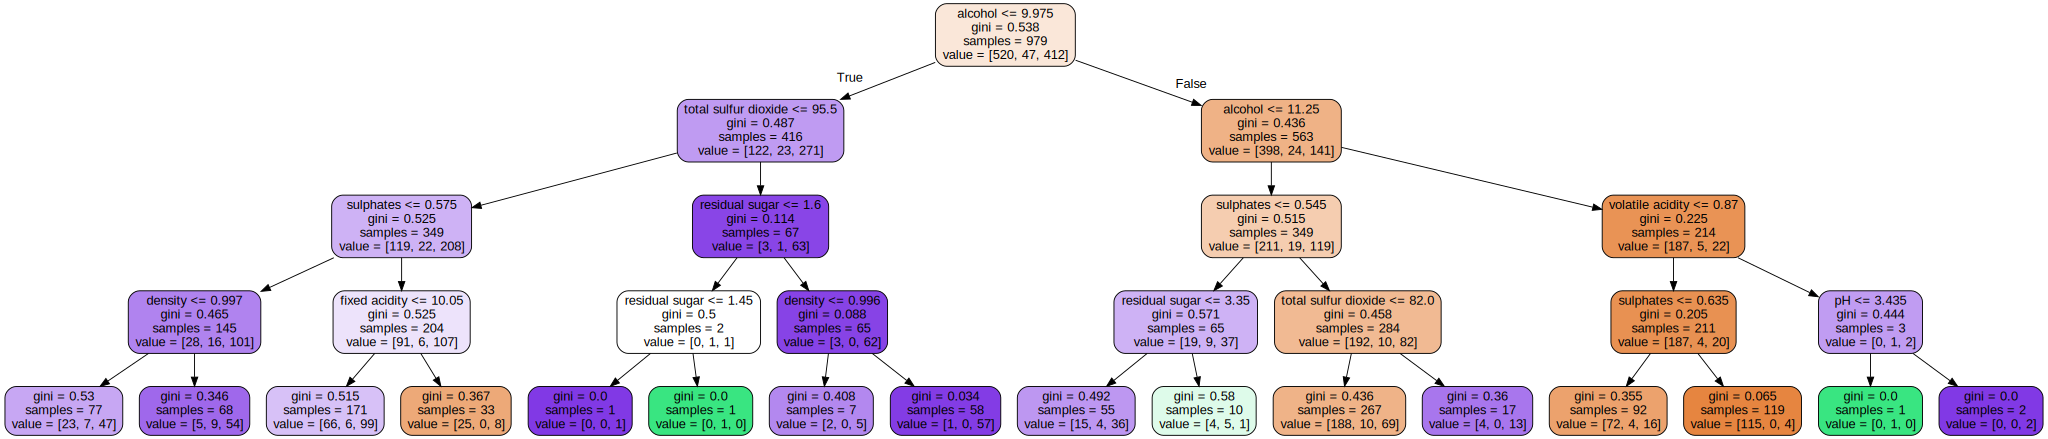

In [544]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeGini,
        out_file=os.path.join(IMAGES_PATH, "entropy_red_tree.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "entropy_red_tree.dot"))

In [547]:
decisionTreeEntropy = decisionTree_(X_train, X_test_val, y_train, y_test_val, setCriterion[0], 4)

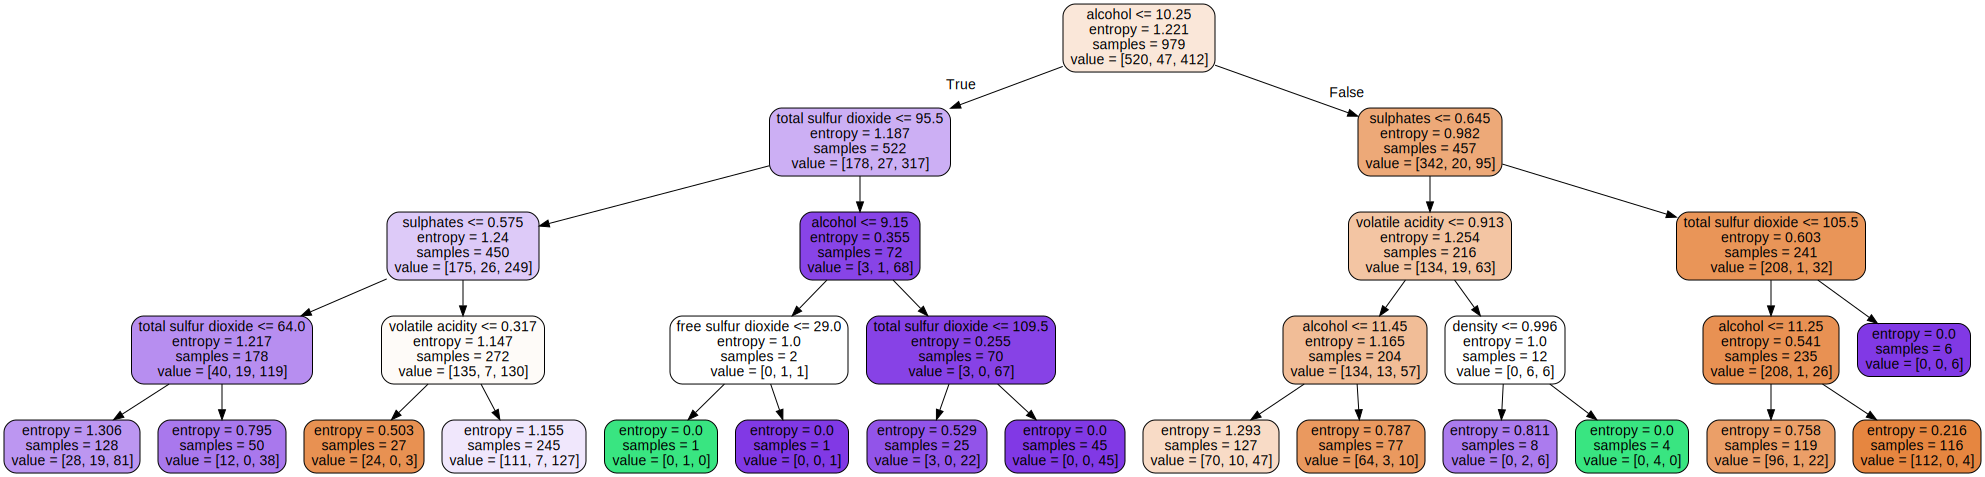

In [548]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeEntropy,
        out_file=os.path.join(IMAGES_PATH, "entropy_red_tree.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "entropy_red_tree.dot"))

### K-NN Classifier

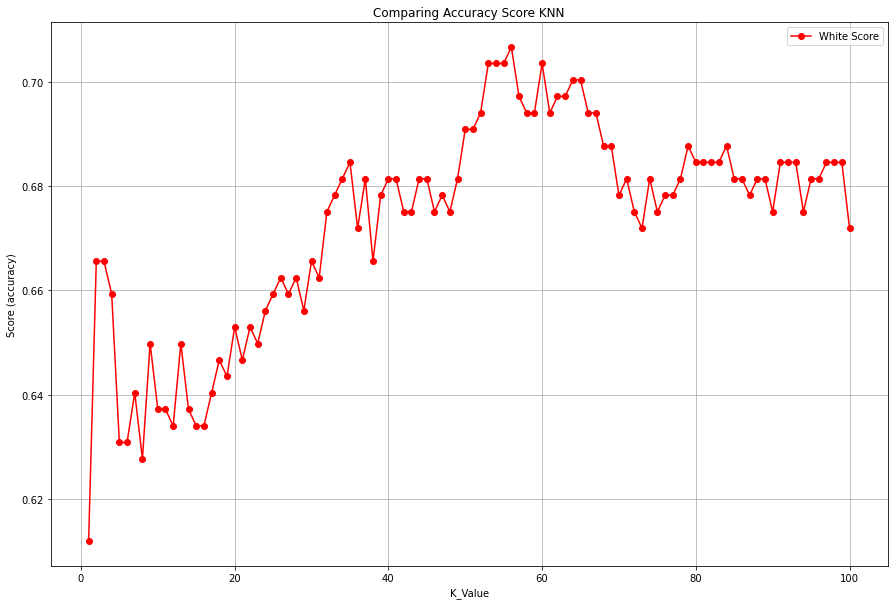

In [549]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNNClassifier(X_train, X_test, y_train, y_test, NumNeigbors):
    KNNClassifier = KNeighborsClassifier(n_neighbors = NumNeigbors)
    KNNClassifier.fit(X_train, y_train)
    return KNNClassifier

# kf = KFold(n_splits=10, random_state=None, shuffle=True)

accuracy_knn = []

for train_index, test_index in kf.split(X_wineWhite_train):

    X_train, X_test_val = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train, y_test_val = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]

    Knn_value = []
    for j in range(1,101):

        KNNClassifier_ = KNNClassifier(X_train, X_test_val, y_train, y_test_val, j)
        KNNClassifier_.fit(X_train, y_train)

        y_pred = KNNClassifier_.predict(X_test_val)
        confusion_mat = confusion_matrix(y_test_val, y_pred)

        # Print classification report
        #target_names_white = ['Low', 'Medium', 'High']

        # you can access each class's metrics from result_metrics
        result_dict = classification_report(y_test_val, y_pred, output_dict=True)


        accuracy_knn.append(['K_Value: {:.2f}'.format(j), result_dict['accuracy']])
        Knn_value.append(j)

# Plot learning curve 

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Comparing Accuracy Score KNN')
ax.set_xlabel("K_Value")
ax.set_ylabel("Score (accuracy)")
ax.grid()


accuracy_list = []

for j in range(1,101):
    accuracy_list.append(accuracy_knn[j-1][1])

ax.plot(Knn_value, accuracy_list, 'o-', color="r", label="White Score")
ax.legend(loc="best")
plt.show() 

accuracy_knn = []
accuracy_list = []

# k = 56

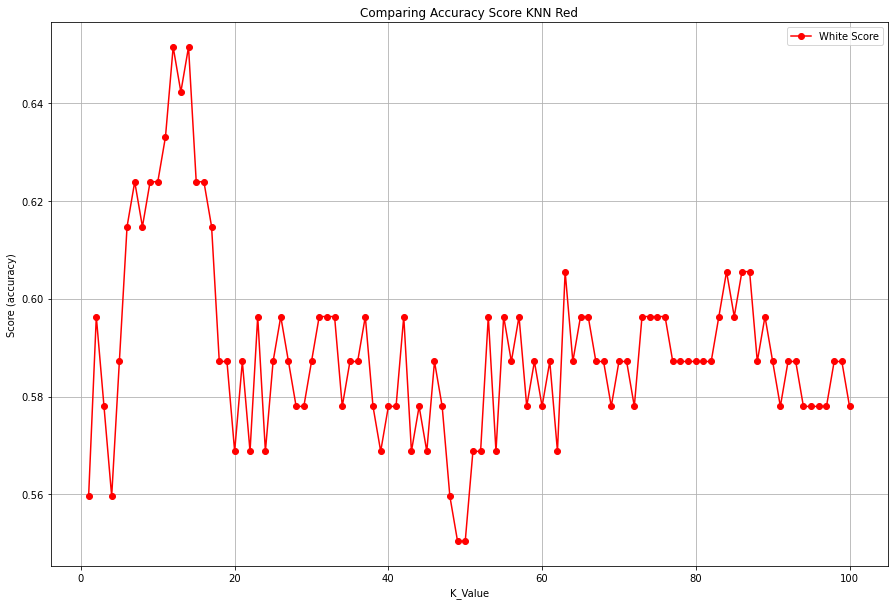

In [550]:
accuracy_knn_red = []

for train_index, test_index in kf.split(X_wineRed_train):

    X_train, X_test_val = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train, y_test_val = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]

    Knn_value = []
    for j in range(1,101):

        KNNClassifier_ = KNNClassifier(X_train, X_test_val, y_train, y_test_val, j)
        KNNClassifier_.fit(X_train, y_train)

        y_pred = KNNClassifier_.predict(X_test_val)
        confusion_mat = confusion_matrix(y_test_val, y_pred)

        # Print classification report
        #target_names_white = ['Low', 'Medium', 'High']

        # you can access each class's metrics from result_metrics
        result_dict = classification_report(y_test_val, y_pred, output_dict=True)


        accuracy_knn_red.append(['K_Value: {:.2f}'.format(j), result_dict['accuracy']])
        Knn_value.append(j)

# Plot learning curve 

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Comparing Accuracy Score KNN Red')
ax.set_xlabel("K_Value")
ax.set_ylabel("Score (accuracy)")
ax.grid()


accuracy_list = []

for j in range(1,101):
    accuracy_list.append(accuracy_knn_red[j-1][1])

ax.plot(Knn_value, accuracy_list, 'o-', color="r", label="White Score")
ax.legend(loc="best")
plt.show() 

accuracy_knn = []
accuracy_list = []

# k = 12

### Naive Bayesian 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

def NaiveBayesClassifier(X_train, X_test, y_train, y_test):
    NBClassifier = GaussianNB().fit(X_train, y_train)
    return NBClassifier

### Optimal size of training data

### White Wine

In [551]:
report_DT_E = []
report_DT_G = []
report_KNN = []
report_NB = []

accuracy_DT_E = []
accuracy_DT_G = []
accuracy_KNN = []
accuracy_NB = []

# class_reports_white = []
categorical_names_white = wineWhite["Categorical Quality"].unique()

for i in [0.50, 0.40, 0.30, 0.20, 0.10]:  
    print("Split test size: ", i)
    X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, 
                                                                                        test_size=i)

    for train_index, test_index in kf.split(X_wineWhite_train):
        X_train, X_test_val = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
        y_train, y_test_val = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]

        DT_Entropy_Clf = decisionTree_(X_train, X_test_val, y_train, y_test_val, "entropy", 3)
        DT_Gini_Clf = decisionTree_(X_train, X_test_val, y_train, y_test_val, "gini", 3)
        KNN_Clf = KNNClassifier(X_train, X_test_val, y_train, y_test_val, 50)
        NB_Clf = NaiveBayesClassifier(X_train, X_test_val, y_train, y_test_val)
        
        y_predict_DT_E = DT_Entropy_Clf.predict(X_test_val)
        y_predict_DT_G = DT_Entropy_Clf.predict(X_test_val)
        y_predict_KNN = KNN_Clf.predict(X_test_val)
        y_predict_NB = NB_Clf.predict(X_test_val)
    
        report_DT_E.append(classification_report(y_test_val, y_predict_DT_E, target_names=categorical_names_white, output_dict=True))
        report_DT_G.append(classification_report(y_test_val, y_predict_DT_G, target_names=categorical_names_white, output_dict=True))
        report_KNN.append(classification_report(y_test_val, y_predict_KNN, target_names=categorical_names_white, output_dict=True))    
        report_NB.append(classification_report(y_test_val, y_predict_NB, target_names=categorical_names_white, output_dict=True))    
      
        accuracy_DT_E.append(report_DT_E[0]["accuracy"])
        accuracy_DT_G.append(report_DT_G[0]["accuracy"])
        accuracy_KNN.append(report_KNN[0]["accuracy"])
        accuracy_NB.append(report_NB[0]["accuracy"])
        
        report_DT_E = []
        report_DT_G = []
        report_KNN = []
        report_NB = []

    

Split test size:  0.5
Split test size:  0.4
Split test size:  0.3
Split test size:  0.2
Split test size:  0.1


[[0.70363951 0.72270364 0.72443674 0.71923744 0.74523397 0.7729636
  0.74696707 0.73310225 0.74176776 0.75563258]
 [0.70990099 0.72376238 0.73366337 0.72673267 0.7019802  0.76831683
  0.72376238 0.72277228 0.73168317 0.73465347]
 [0.71725572 0.70893971 0.71101871 0.74151074 0.70547471 0.74151074
  0.71101871 0.73804574 0.6964657  0.73665974]
 [0.72867804 0.71535181 0.72441365 0.73560768 0.71055437 0.73347548
  0.73027719 0.71855011 0.70682303 0.71641791]
 [0.68990905 0.70939801 0.73148549 0.73018623 0.70550022 0.73018623
  0.73061932 0.72065829 0.71113036 0.70809874]]
[[0.69781931 0.70716511 0.70093458 0.7258567  0.72897196 0.68224299
  0.66666667 0.7258567  0.7        0.6875    ]
 [0.70093458 0.69158879 0.7258567  0.72897196 0.69470405 0.68535826
  0.68224299 0.69781931 0.703125   0.703125  ]
 [0.73831776 0.67912773 0.70093458 0.71339564 0.71028037 0.6728972
  0.68535826 0.74454829 0.7        0.6875    ]
 [0.72897196 0.68847352 0.70404984 0.7165109  0.73208723 0.67601246
  0.71028037 

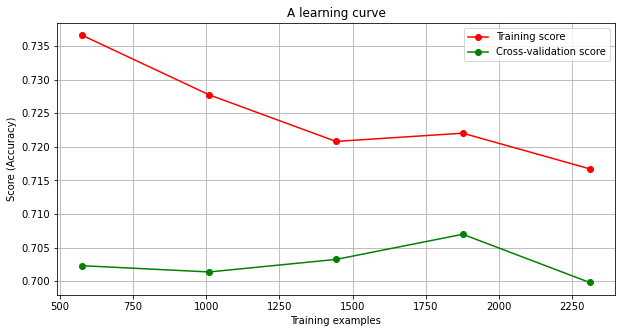

In [552]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(DT_Entropy_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# Best split DT_E test = 0.2

[[0.7677643  0.7712305  0.77642981 0.73483536 0.75216638 0.76083189
  0.76083189 0.7712305  0.74870017 0.78162912]
 [0.74851485 0.75643564 0.74257426 0.72574257 0.73366337 0.72970297
  0.73366337 0.75544554 0.72079208 0.75742574]
 [0.73943174 0.72834373 0.72626473 0.74081774 0.74844075 0.72487872
  0.73388773 0.74636175 0.73665974 0.73458073]
 [0.72921109 0.72707889 0.7228145  0.72707889 0.73933902 0.72707889
  0.73347548 0.72441365 0.72814499 0.73294243]
 [0.72628844 0.73148549 0.72065829 0.72932005 0.72672152 0.73018623
  0.72672152 0.72152447 0.7275877  0.72845388]]
[[0.73831776 0.71962617 0.72274143 0.68847352 0.73831776 0.68847352
  0.65109034 0.73208723 0.7        0.725     ]
 [0.72274143 0.6728972  0.72274143 0.7165109  0.72897196 0.68847352
  0.65732087 0.70716511 0.69375    0.70625   ]
 [0.74454829 0.69470405 0.73831776 0.71962617 0.73520249 0.71962617
  0.66978193 0.70093458 0.684375   0.70625   ]
 [0.72274143 0.70404984 0.72274143 0.72274143 0.74143302 0.72274143
  0.6884735

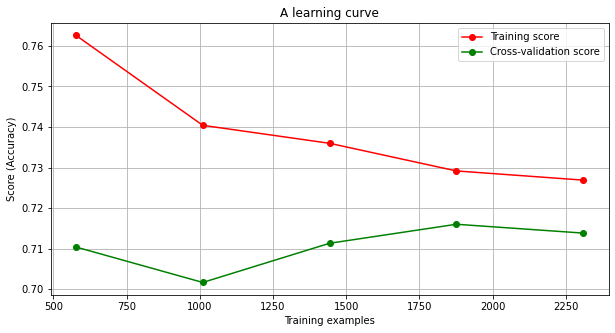

In [553]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(DT_Gini_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# Best split is 0.2

[[0.68457539 0.65511265 0.68457539 0.63951473 0.67764298 0.67937608
  0.6897747  0.67937608 0.67244367 0.6932409 ]
 [0.68514851 0.67821782 0.68415842 0.64356436 0.66138614 0.67326733
  0.66435644 0.65544554 0.67425743 0.67029703]
 [0.66943867 0.67082467 0.67290367 0.66250866 0.67706168 0.67567568
  0.68121968 0.67567568 0.67359667 0.68191268]
 [0.68390192 0.67430704 0.67164179 0.67324094 0.67324094 0.6684435
  0.67324094 0.67377399 0.67324094 0.67270789]
 [0.67951494 0.6773495  0.68644435 0.66782157 0.67561715 0.67475097
  0.67994803 0.66912083 0.6738848  0.67128627]]
[[0.66666667 0.66978193 0.66666667 0.67601246 0.70093458 0.66666667
  0.65732087 0.64797508 0.671875   0.6625    ]
 [0.65420561 0.6728972  0.65109034 0.68224299 0.69470405 0.66043614
  0.64797508 0.65732087 0.646875   0.6625    ]
 [0.65109034 0.65732087 0.65732087 0.65109034 0.69781931 0.66666667
  0.66978193 0.65109034 0.678125   0.6625    ]
 [0.64485981 0.66666667 0.66043614 0.66978193 0.68224299 0.65732087
  0.6728972 

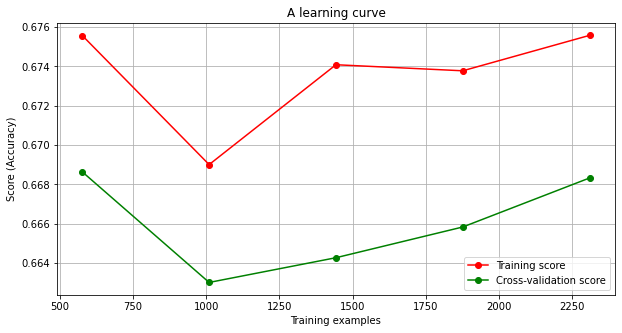

In [554]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(KNN_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# Best split 0.4 

[[0.70710572 0.6897747  0.71230503 0.71577123 0.67590988 0.6915078
  0.68110919 0.68804159 0.71923744 0.72097054]
 [0.7        0.69009901 0.6990099  0.71683168 0.67920792 0.6950495
  0.67920792 0.67623762 0.6970297  0.7029703 ]
 [0.6964657  0.68953569 0.69300069 0.7020097  0.67775468 0.69230769
  0.68607069 0.68884269 0.68884269 0.7013167 ]
 [0.69509595 0.70149254 0.6924307  0.69296375 0.68443497 0.69402985
  0.68123667 0.67910448 0.69083156 0.69136461]
 [0.69380684 0.69943699 0.69337375 0.68601126 0.68644435 0.69034214
  0.67951494 0.68557817 0.69467302 0.68774361]]
[[0.68847352 0.63239875 0.69781931 0.72274143 0.6635514  0.68847352
  0.69158879 0.7258567  0.678125   0.65      ]
 [0.67912773 0.62616822 0.70093458 0.72274143 0.6728972  0.69781931
  0.69158879 0.7258567  0.6625     0.659375  ]
 [0.68535826 0.64174455 0.68535826 0.7165109  0.67912773 0.70093458
  0.69470405 0.70404984 0.66875    0.66875   ]
 [0.6728972  0.63551402 0.68224299 0.7165109  0.69470405 0.69781931
  0.69470405 

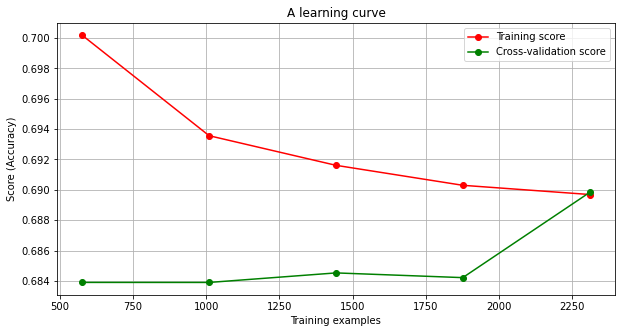

In [555]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(NB_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# Best split 0.1

In [556]:
average_training_size = (0.2 + 0.2 + 0.4 + 0.1)/4
print(average_training_size)

0.225


### Red Wine

In [560]:
report_DT_E = []
report_DT_G = []
report_KNN = []
report_NB = []

accuracy_DT_E = []
accuracy_DT_G = []
accuracy_KNN = []
accuracy_NB = []

# class_reports_white = []
categorical_names_Red = wineRed["Categorical Quality"].unique()

for i in [0.50, 0.40, 0.30, 0.20, 0.10]:  
    print("Split test size: ", i)
    X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, 
                                                                                        test_size=i)

    for train_index, test_index in kf.split(X_wineRed_train):
        X_train, X_test_val = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
        y_train, y_test_val = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]

        DT_Entropy_Clf = decisionTree_(X_train, X_test_val, y_train, y_test_val, "entropy", 3)
        DT_Gini_Clf = decisionTree_(X_train, X_test_val, y_train, y_test_val, "gini", 3)
        KNN_Clf = KNNClassifier(X_train, X_test_val, y_train, y_test_val, 50)
        NB_Clf = NaiveBayesClassifier(X_train, X_test_val, y_train, y_test_val)
        
        y_predict_DT_E = DT_Entropy_Clf.predict(X_test_val)
        y_predict_DT_G = DT_Entropy_Clf.predict(X_test_val)
        y_predict_KNN = KNN_Clf.predict(X_test_val)
        y_predict_NB = NB_Clf.predict(X_test_val)
    
        report_DT_E.append(classification_report(y_test_val, y_predict_DT_E, target_names=categorical_names_Red, output_dict=True))
        report_DT_G.append(classification_report(y_test_val, y_predict_DT_G, target_names=categorical_names_Red, output_dict=True))
        report_KNN.append(classification_report(y_test_val, y_predict_KNN, target_names=categorical_names_Red, output_dict=True))    
        report_NB.append(classification_report(y_test_val, y_predict_NB, target_names=categorical_names_Red, output_dict=True))    
      
        accuracy_DT_E.append(report_DT_E[0]["accuracy"])
        accuracy_DT_G.append(report_DT_G[0]["accuracy"])
        accuracy_KNN.append(report_KNN[0]["accuracy"])
        accuracy_NB.append(report_NB[0]["accuracy"])
        
        report_DT_E = []
        report_DT_G = []
        report_KNN = []
        report_NB = []


Split test size:  0.5
Split test size:  0.4
Split test size:  0.3
Split test size:  0.2
Split test size:  0.1


[[0.75757576 0.7979798  0.73737374 0.73737374 0.75252525 0.74747475
  0.75757576 0.81818182 0.78787879 0.72727273]
 [0.74855491 0.69364162 0.73699422 0.72254335 0.73410405 0.74277457
  0.74855491 0.71098266 0.73121387 0.71387283]
 [0.74747475 0.72323232 0.72525253 0.70909091 0.6989899  0.71515152
  0.73535354 0.73131313 0.74545455 0.70707071]
 [0.71228616 0.70451011 0.70451011 0.68895801 0.70606532 0.68895801
  0.68584759 0.71073095 0.68429238 0.72783826]
 [0.7020202  0.70580808 0.70328283 0.70707071 0.6969697  0.68308081
  0.71338384 0.69823232 0.70328283 0.71085859]]
[[0.65765766 0.62727273 0.73636364 0.65454545 0.70909091 0.6
  0.67272727 0.66363636 0.60909091 0.65454545]
 [0.66666667 0.58181818 0.74545455 0.7        0.7        0.68181818
  0.62727273 0.71818182 0.62727273 0.59090909]
 [0.7027027  0.65454545 0.74545455 0.65454545 0.63636364 0.67272727
  0.65454545 0.70909091 0.63636364 0.6       ]
 [0.7027027  0.65454545 0.75454545 0.68181818 0.63636364 0.72727273
  0.64545455 0.709

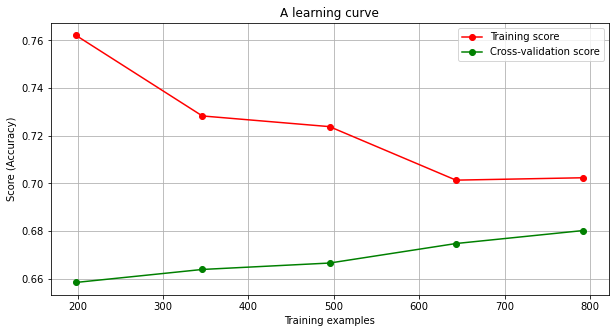

In [561]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(DT_Entropy_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# best 0.1

[[0.78282828 0.80808081 0.73232323 0.75252525 0.77272727 0.73737374
  0.77777778 0.74747475 0.81313131 0.72222222]
 [0.76011561 0.76878613 0.73699422 0.70520231 0.7283237  0.75144509
  0.76878613 0.73988439 0.74566474 0.74277457]
 [0.75151515 0.75353535 0.71313131 0.71717172 0.73333333 0.74343434
  0.71717172 0.74343434 0.75959596 0.7030303 ]
 [0.74339036 0.72161742 0.70762053 0.718507   0.69828927 0.73872473
  0.72317263 0.7340591  0.68895801 0.7029549 ]
 [0.73484848 0.75       0.70454545 0.71464646 0.72222222 0.73989899
  0.70328283 0.71464646 0.7260101  0.71717172]]
[[0.71171171 0.70909091 0.67272727 0.67272727 0.58181818 0.63636364
  0.62727273 0.71818182 0.68181818 0.60909091]
 [0.65765766 0.65454545 0.75454545 0.7        0.6        0.69090909
  0.65454545 0.63636364 0.7        0.65454545]
 [0.69369369 0.68181818 0.70909091 0.73636364 0.7        0.7
  0.60909091 0.74545455 0.69090909 0.64545455]
 [0.71171171 0.62727273 0.70909091 0.70909091 0.65454545 0.70909091
  0.68181818 0.690

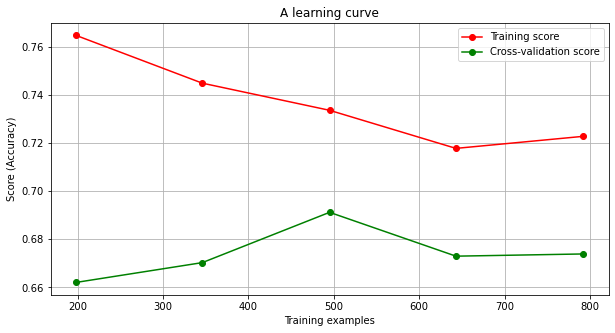

In [562]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(DT_Gini_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# best 0.3

[[0.59090909 0.58080808 0.6010101  0.62121212 0.62121212 0.6010101
  0.66666667 0.64141414 0.61616162 0.66161616]
 [0.61849711 0.60115607 0.61271676 0.60404624 0.64739884 0.63294798
  0.65606936 0.63294798 0.64450867 0.63583815]
 [0.63232323 0.64040404 0.61616162 0.57979798 0.64040404 0.62626263
  0.64040404 0.62828283 0.63838384 0.64848485]
 [0.63452566 0.65163297 0.63297045 0.6096423  0.65474339 0.64230171
  0.63919129 0.62363919 0.64541213 0.6562986 ]
 [0.64393939 0.65909091 0.65530303 0.63762626 0.64015152 0.64520202
  0.64267677 0.64267677 0.63888889 0.6489899 ]]
[[0.56756757 0.6        0.60909091 0.61818182 0.60909091 0.55454545
  0.54545455 0.59090909 0.57272727 0.61818182]
 [0.55855856 0.66363636 0.62727273 0.6        0.60909091 0.6
  0.58181818 0.60909091 0.58181818 0.59090909]
 [0.55855856 0.66363636 0.60909091 0.67272727 0.60909091 0.62727273
  0.60909091 0.61818182 0.6        0.63636364]
 [0.56756757 0.67272727 0.6        0.70909091 0.60909091 0.57272727
  0.64545455 0.6545

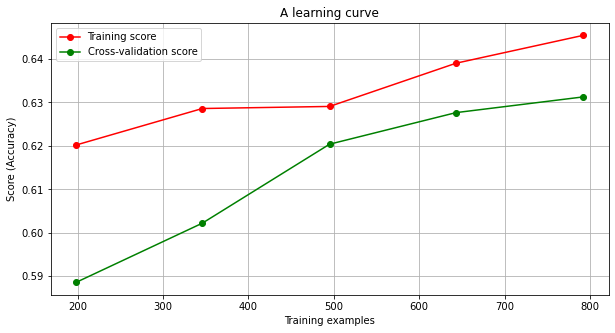

In [563]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(KNN_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [ ]:
# best 0.1

[[0.63636364 0.67676768 0.67171717 0.63636364 0.71717172 0.7020202
  0.67171717 0.63131313 0.7020202  0.73737374]
 [0.69364162 0.68208092 0.63294798 0.61849711 0.73988439 0.68208092
  0.6849711  0.63294798 0.6734104  0.67052023]
 [0.67676768 0.65454545 0.65050505 0.62828283 0.70505051 0.67878788
  0.72323232 0.63232323 0.7010101  0.68080808]
 [0.69206843 0.65785381 0.65163297 0.67029549 0.69206843 0.68895801
  0.68273717 0.63452566 0.69828927 0.66718507]
 [0.69570707 0.68181818 0.67045455 0.67929293 0.68813131 0.68686869
  0.68813131 0.66287879 0.6969697  0.68813131]]
[[0.56756757 0.68181818 0.66363636 0.68181818 0.66363636 0.62727273
  0.64545455 0.68181818 0.63636364 0.59090909]
 [0.66666667 0.71818182 0.69090909 0.7        0.66363636 0.70909091
  0.65454545 0.68181818 0.62727273 0.63636364]
 [0.67567568 0.74545455 0.70909091 0.68181818 0.7        0.70909091
  0.64545455 0.66363636 0.62727273 0.64545455]
 [0.67567568 0.73636364 0.71818182 0.74545455 0.69090909 0.70909091
  0.62727273

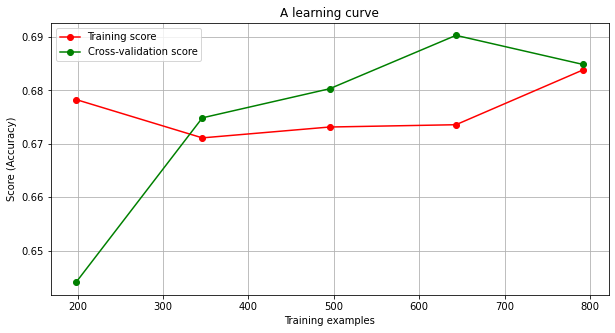

In [564]:
from sklearn.model_selection import learning_curve

# evaluate the training and testing and retrieve the information of model performance.

train_sizes = np.linspace(0.2,0.8,5)
train_sizes, train_accuracy, test_accuracy = learning_curve(NB_Clf, X_train, y_train, train_sizes = train_sizes, 
                                scoring='accuracy',cv=10, shuffle = True)

print(train_accuracy)
print(test_accuracy)

train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('A learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (Accuracy)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [565]:
average_split_Red = (.1+.1+.1+.3)/4
print(average_split_Red)

0.15000000000000002


### Test models with optimal parameters using test set

### Decision Tree (Entropy)

In [566]:
setCriterion = ['entropy','gini']

In [567]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    
    plt.title('Confusion matrix')
    plt.colorbar()
    
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [568]:
def decisionTree_(X_train, X_test, y_train, y_test, Criterion_, max_depth):
    decisionTree = DecisionTreeClassifier(criterion = Criterion_, max_depth=max_depth); #max_depth=10, criterion="gini", random_state=42);
    decisionTree.fit(X_train, y_train)
    return decisionTree

In [569]:
# def ResultScoreTestSize(setCriterion_):
    
class_reports_white = []
class_reports_red = []
categorical_names_white = wineWhite["Categorical Quality"].unique()
categorical_names_red = wineRed["Categorical Quality"].unique()



#    for i in [0.50, 0.40, 0.30, 0.20, 0.10]:  
X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, 
                                                                                            test_size=0.225)
X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, 
                                                                                            test_size=0.15)       
dtreeWhite = decisionTree_(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, setCriterion[0], 8)
dtreeRed = decisionTree_(X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test, setCriterion[0], 4)


y_pred_white = dtreeWhite.predict(X_wineWhite_test)
y_pred_red = dtreeRed.predict(X_wineRed_test)
class_reports_white.append(classification_report(y_wineWhite_test, y_pred_white, target_names=categorical_names_white, output_dict=True))
class_reports_red.append(classification_report(y_wineRed_test, y_pred_red, target_names=categorical_names_red, output_dict=True))

#   return class_reports_white, class_reports_red, y_pred_white, y_pred_red     

In [570]:
from sklearn.metrics import confusion_matrix

def PrintResultScoreTestSize():
    accuracy_score_white = []
    accuracy_score_red = []
  
    accuracy_score_white.append(class_reports_white[0]['accuracy'])
    accuracy_score_red.append(class_reports_red[0]['accuracy'])
    
    # Confusion Matrix
    
    # plot a confusion matrix
    print('Confusion Matrix White')
    confusion_mat = confusion_matrix(y_wineWhite_test, y_pred_white)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_white = classification_report(y_wineWhite_test, y_pred_white, target_names=target_names, output_dict=False)
    print(result_white)
    print("accuracy score for white wine: ", accuracy_score_white[0])
    
    # plot a confusion matrix
    print()
    print('Confusion Matrix Red')
    confusion_mat = confusion_matrix(y_wineRed_test, y_pred_red)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_red = classification_report(y_wineRed_test, y_pred_red, target_names=target_names, output_dict=False)
    print(result_red)
    print("accuracy score for red wine: ", accuracy_score_red[0])
    
#      # Plot learning curve
#     fig, ax = plt.subplots(1, 1, figsize=(5, 3))
#     ax.set_title('Comparing Accuracy Score')
#     ax.set_xlabel("Test Split Size")
#     ax.set_ylabel("Score (accuracy)")
#     ax.grid()

#     Split_Size = [0.50, 0.40, 0.30, 0.20, 0.10]

#     ax.plot(Split_Size, accuracy_score_white, 'o-', color="r", label="White Score")
#     ax.plot(Split_Size, accuracy_score_red, 'o-', color="g", label="Red Score")
#     ax.legend(loc="best")
#     plt.show()
    
#     return

Confusion Matrix White
[[502   7  84]
 [ 10   7  12]
 [130  13 127]]


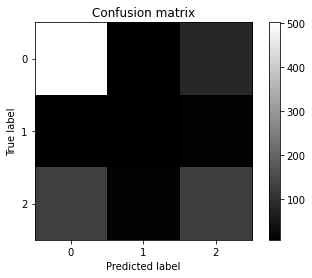

              precision    recall  f1-score   support

         Low       0.78      0.85      0.81       593
      Medium       0.26      0.24      0.25        29
        High       0.57      0.47      0.52       270

    accuracy                           0.71       892
   macro avg       0.54      0.52      0.53       892
weighted avg       0.70      0.71      0.70       892

accuracy score for white wine:  0.7130044843049327

Confusion Matrix Red
[[82  1 26]
 [ 5  0  5]
 [33  0 52]]


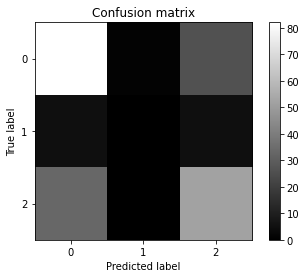

              precision    recall  f1-score   support

         Low       0.68      0.75      0.72       109
      Medium       0.00      0.00      0.00        10
        High       0.63      0.61      0.62        85

    accuracy                           0.66       204
   macro avg       0.44      0.45      0.45       204
weighted avg       0.63      0.66      0.64       204

accuracy score for red wine:  0.6568627450980392


In [571]:
#class_reports_white, class_reports_red, y_pred_white, y_pred_red = ResultScoreTestSize(setCriterion[0])
#decisionTreeEntropy = decisionTree_(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, setCriterion[0])
PrintResultScoreTestSize()

Accuracy =  0.26157737709171097


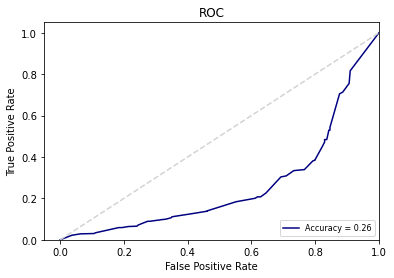

In [572]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_white = dtreeWhite.predict_proba(X_wineWhite_test)

# print(y_wineWhite_test)
# print(type(y_wineWhite_test))
# y_wineWhite_test ['Low'] =
# y_wineWhite_test['Medium']
# y_wineWhite_test['High']

# y_test_white = pd.DataFrame({"categorical quality": y_wineWhite_test})
# y_test_white['Low'] = y_test_white['categorical quality']
# y_test_white['Medium'] = y_test_white['categorical quality']
# y_test_white['High'] = y_test_white['categorical quality']

# cleanup_nums = {"Low": {"Low": 1, 'Medium': 0 , "High": 0}}
# y_test_white = y_test_white.replace(cleanup_nums)
# cleanup_nums = {"Medium": {"Low": 0, 'Medium': 1 , "High": 0}}
# y_test_white = y_test_white.replace(cleanup_nums)
# cleanup_nums = {"High": {"Low": 0, 'Medium': 0 , "High": 1}}
# y_test_white = y_test_white.replace(cleanup_nums)


# y_test_white = y_test_white.drop(['categorical quality'], axis=1)

y_test = label_binarize(y_wineWhite_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_white, true_positive_rate_white, thresholds = roc_curve(y_test[:, i] , y_score_white[:, i])

roc_auc_white = auc(false_positive_rate_white, true_positive_rate_white)
print('Accuracy = ', roc_auc_white)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_white, true_positive_rate_white, c=color, label=('Accuracy = %0.2f'%roc_auc_white))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy =  0.452390149686142


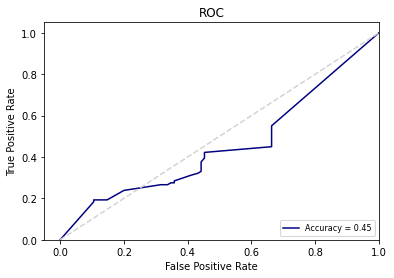

In [573]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_red = dtreeWhite.predict_proba(X_wineRed_test)

y_test = label_binarize(y_wineRed_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_red, true_positive_rate_red, thresholds = roc_curve(y_test[:, i] , y_score_red[:, i])

roc_auc_red = auc(false_positive_rate_red, true_positive_rate_red)
print('Accuracy = ', roc_auc_red)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_red, true_positive_rate_red, c=color, label=('Accuracy = %0.2f'%roc_auc_red))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [574]:
decisionTreeEntropy = decisionTree_(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, setCriterion[0], 8)

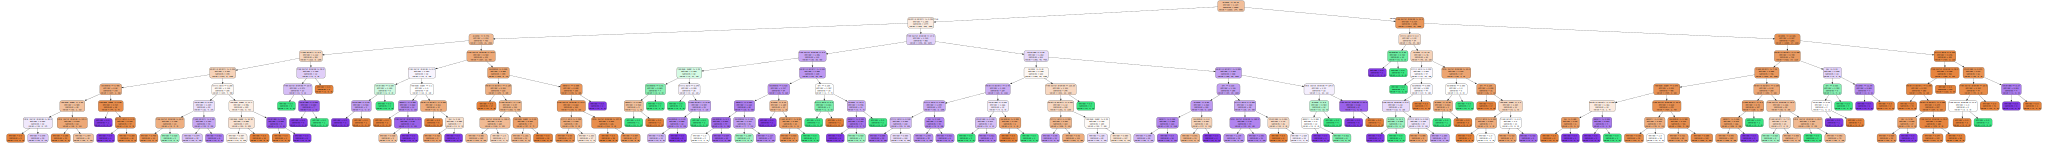

In [575]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeEntropy,
        out_file=os.path.join(IMAGES_PATH, "entropy_white_tree_test_data.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "entropy_white_tree_test_data.dot"))

In [577]:
decisionTreeEntropy = decisionTree_(X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test, setCriterion[0], 4)

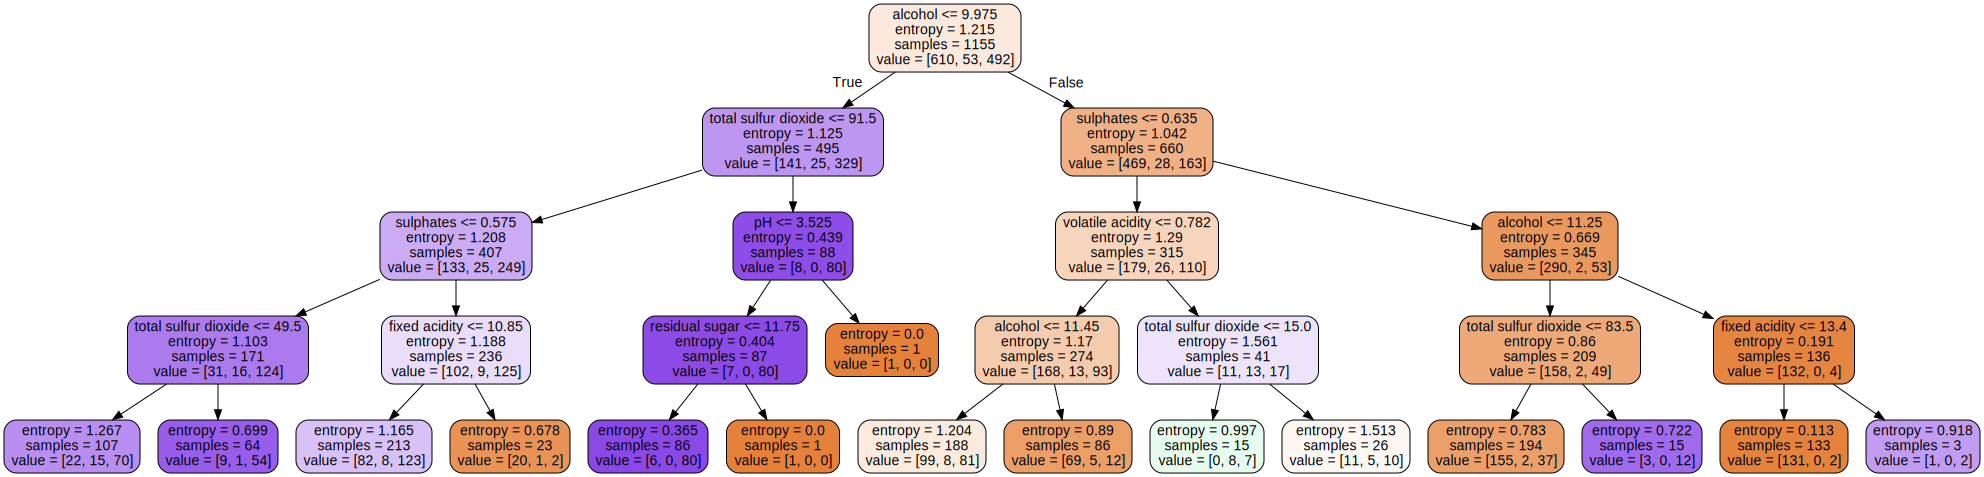

In [579]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeEntropy,
        out_file=os.path.join(IMAGES_PATH, "entropy_red_tree_test_data.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "entropy_red_tree_test_data.dot"))

### Important features from a decision tree using information gain measure (entropy)

In [580]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

### White Wine

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.68


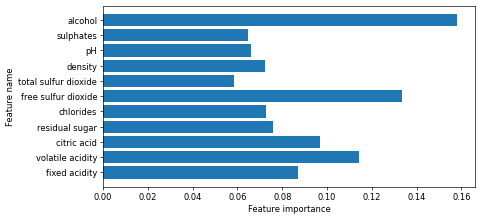

Feature importances: [0.08697371 0.11418796 0.09688604 0.07599533 0.07265857 0.13357202
 0.05858058 0.07242883 0.06586573 0.0646708  0.15818044]


In [581]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_wineWhite_train, y_wineWhite_train)

train_score = clf.score(X_wineWhite_train, y_wineWhite_train)
test_score = clf.score(X_wineWhite_test, y_wineWhite_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

plt.figure(figsize=(8,4), dpi=60)

# import features (call the function above)
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
plot_feature_importances(clf, features)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### Red Wine

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.60


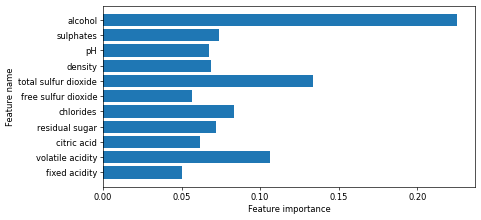

Feature importances: [0.05044697 0.10622897 0.06185031 0.07188239 0.08356983 0.05634106
 0.13369302 0.06897688 0.06761899 0.07390809 0.2254835 ]


In [582]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_wineRed_train, y_wineRed_train)

train_score = clf.score(X_wineRed_train, y_wineRed_train)
test_score = clf.score(X_wineRed_test, y_wineRed_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

plt.figure(figsize=(8,4), dpi=60)

# import features (call the function above)
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
plot_feature_importances(clf, features)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### Decision Tree (GINI)

In [583]:
# def ResultScoreTestSize(setCriterion_):
    
class_reports_white = []
class_reports_red = []
categorical_names_white = wineWhite["Categorical Quality"].unique()
categorical_names_red = wineRed["Categorical Quality"].unique()



#    for i in [0.50, 0.40, 0.30, 0.20, 0.10]:  
X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, 
                                                                                            test_size=0.225)
X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, 
                                                                                            test_size=0.15)       
dtreeWhite = decisionTree_(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, setCriterion[1], 4)
dtreeRed = decisionTree_(X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test, setCriterion[1], 4)


y_pred_white = dtreeWhite.predict(X_wineWhite_test)
y_pred_red = dtreeRed.predict(X_wineRed_test)
class_reports_white.append(classification_report(y_wineWhite_test, y_pred_white, target_names=categorical_names_white, output_dict=True))
class_reports_red.append(classification_report(y_wineRed_test, y_pred_red, target_names=categorical_names_red, output_dict=True))

#   return class_reports_white, class_reports_red, y_pred_white, y_pred_red     

In [584]:
from sklearn.metrics import confusion_matrix

def PrintResultScoreTestSize():
    accuracy_score_white = []
    accuracy_score_red = []
  
    accuracy_score_white.append(class_reports_white[0]['accuracy'])
    accuracy_score_red.append(class_reports_red[0]['accuracy'])
    
    # Confusion Matrix
    
    # plot a confusion matrix
    print('Confusion Matrix White')
    confusion_mat = confusion_matrix(y_wineWhite_test, y_pred_white)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_white = classification_report(y_wineWhite_test, y_pred_white, target_names=target_names, output_dict=False)
    print(result_white)
    print("accuracy score for white wine: ", accuracy_score_white[0])
    
    print()
    # plot a confusion matrix
    print('Confusion Matrix Red')
    confusion_mat = confusion_matrix(y_wineRed_test, y_pred_red)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_red = classification_report(y_wineRed_test, y_pred_red, target_names=target_names, output_dict=False)
    print(result_red)
    print("accuracy score for red wine: ", accuracy_score_red[0])

Confusion Matrix White
[[488   1  90]
 [ 19   1  21]
 [125   1 146]]


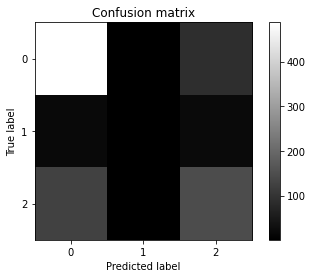

              precision    recall  f1-score   support

         Low       0.77      0.84      0.81       579
      Medium       0.33      0.02      0.05        41
        High       0.57      0.54      0.55       272

    accuracy                           0.71       892
   macro avg       0.56      0.47      0.47       892
weighted avg       0.69      0.71      0.69       892

accuracy score for white wine:  0.7118834080717489

Confusion Matrix Red
[[78  0 21]
 [ 2  0  7]
 [28  2 66]]


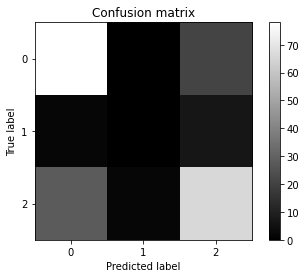

              precision    recall  f1-score   support

         Low       0.72      0.79      0.75        99
      Medium       0.00      0.00      0.00         9
        High       0.70      0.69      0.69        96

    accuracy                           0.71       204
   macro avg       0.47      0.49      0.48       204
weighted avg       0.68      0.71      0.69       204

accuracy score for red wine:  0.7058823529411765


In [585]:
#class_reports_white, class_reports_red, y_pred_white, y_pred_red = ResultScoreTestSize(setCriterion[0])
#decisionTreeEntropy = decisionTree_(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, setCriterion[0])
PrintResultScoreTestSize()

Accuracy =  0.23201288991154737


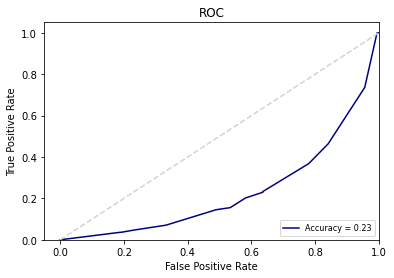

In [586]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_white = dtreeWhite.predict_proba(X_wineWhite_test)

# print(y_wineWhite_test)
# print(type(y_wineWhite_test))
# y_wineWhite_test ['Low'] =
# y_wineWhite_test['Medium']
# y_wineWhite_test['High']

# y_test_white = pd.DataFrame({"categorical quality": y_wineWhite_test})
# y_test_white['Low'] = y_test_white['categorical quality']
# y_test_white['Medium'] = y_test_white['categorical quality']
# y_test_white['High'] = y_test_white['categorical quality']

# cleanup_nums = {"Low": {"Low": 1, 'Medium': 0 , "High": 0}}
# y_test_white = y_test_white.replace(cleanup_nums)
# cleanup_nums = {"Medium": {"Low": 0, 'Medium': 1 , "High": 0}}
# y_test_white = y_test_white.replace(cleanup_nums)
# cleanup_nums = {"High": {"Low": 0, 'Medium': 0 , "High": 1}}
# y_test_white = y_test_white.replace(cleanup_nums)


# y_test_white = y_test_white.drop(['categorical quality'], axis=1)

y_test = label_binarize(y_wineWhite_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_white, true_positive_rate_white, thresholds = roc_curve(y_test[:, i] , y_score_white[:, i])
    

roc_auc_white = auc(false_positive_rate_white, true_positive_rate_white)
print('Accuracy = ', roc_auc_white)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_white, true_positive_rate_white, c=color, label=('Accuracy = %0.2f'%roc_auc_white))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy =  0.2524290524290524


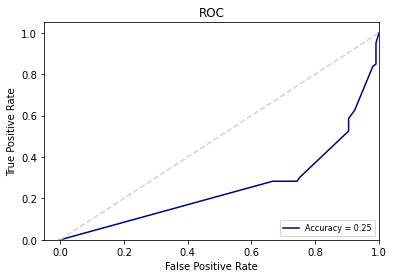

In [587]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_red = dtreeWhite.predict_proba(X_wineRed_test)

y_test = label_binarize(y_wineRed_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_red, true_positive_rate_red, thresholds = roc_curve(y_test[:, i] , y_score_red[:, i])

roc_auc_red = auc(false_positive_rate_red, true_positive_rate_red)
print('Accuracy = ', roc_auc_red)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_red, true_positive_rate_red, c=color, label=('Accuracy = %0.2f'%roc_auc_red))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [588]:
decisionTreeGini = decisionTree_(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, setCriterion[1], 4)

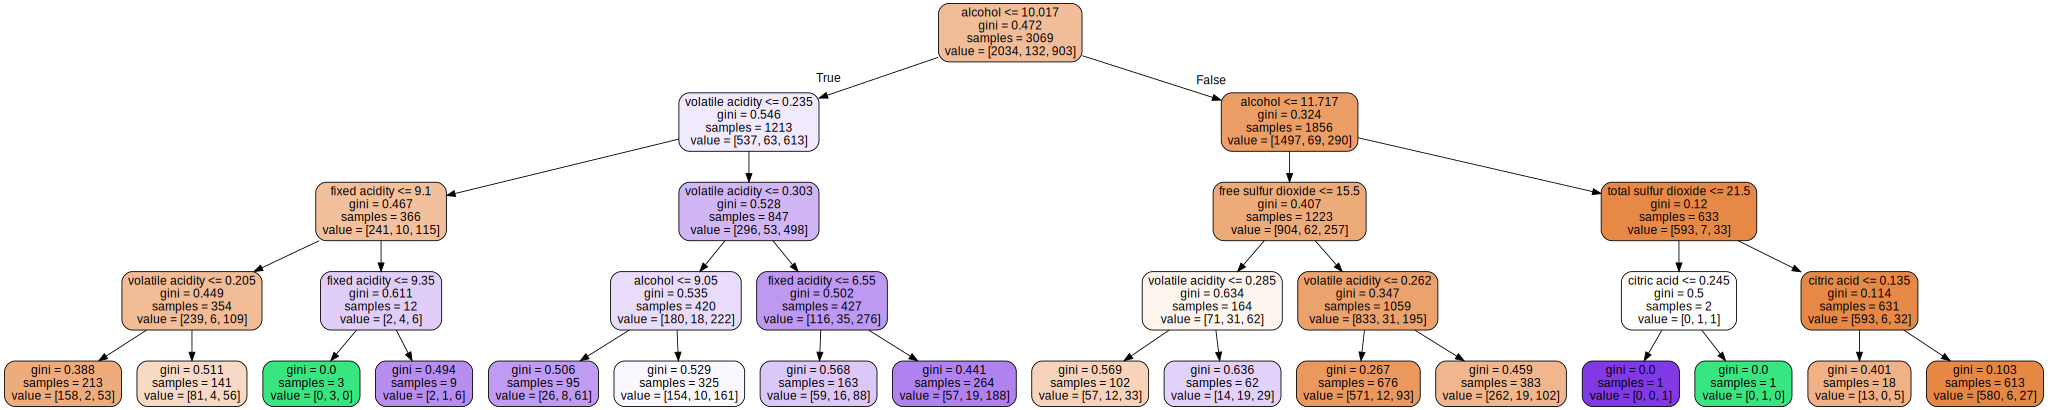

In [589]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeGini,
        out_file=os.path.join(IMAGES_PATH, "gini_white_tree_test_data.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "gini_white_tree_test_data.dot"))

In [590]:
decisionTreeGini = decisionTree_(X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test, setCriterion[1], 4)

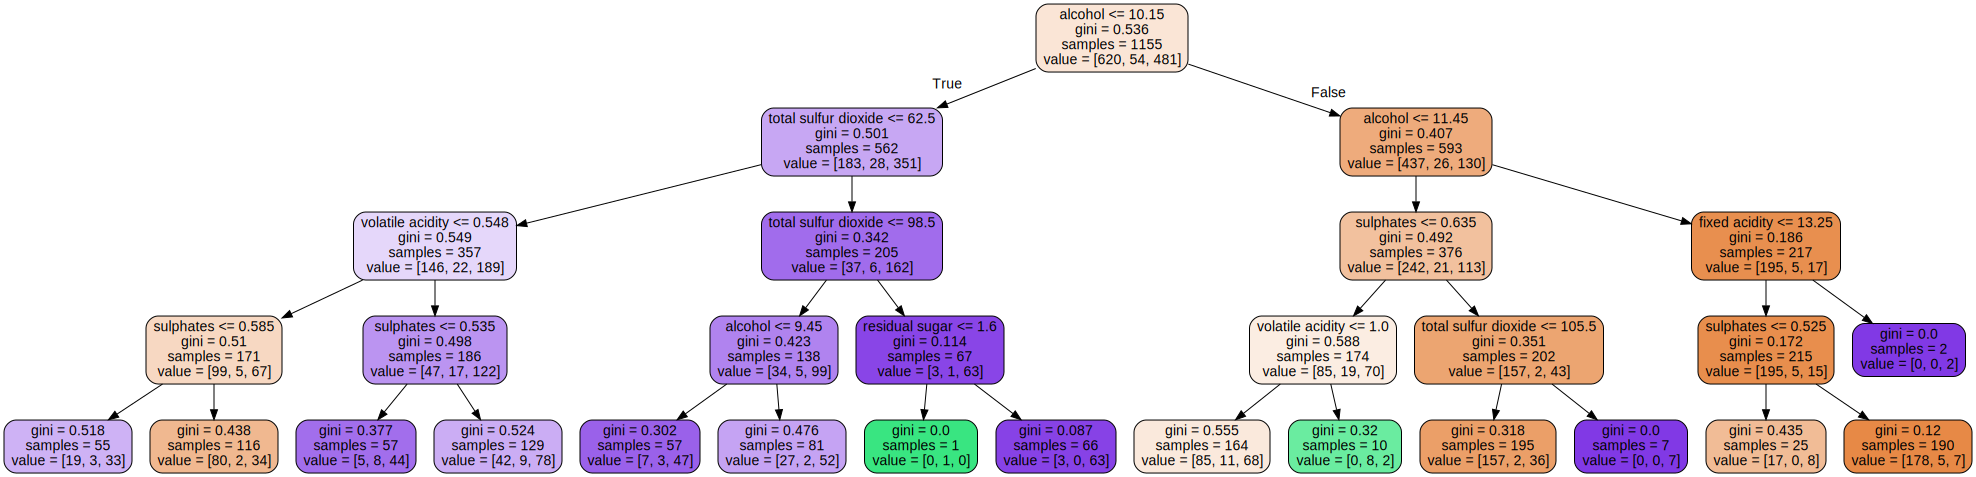

In [591]:
list_feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#list_class_names = 'Categorical Quality'
export_graphviz(
        decisionTreeGini,
        out_file=os.path.join(IMAGES_PATH, "gini_red_tree_test_data.dot"),
        feature_names= list_feature_names,
        #class_names= list_class_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "gini_red_tree_test_data.dot"))

### Important features from a decision tree using gini index

In [592]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

### White Wine

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.66


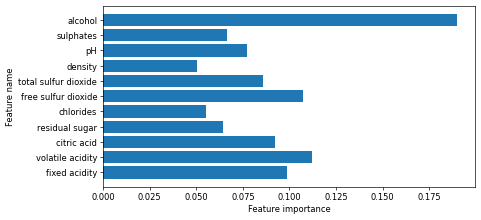

Feature importances: [0.09877036 0.11190175 0.09203298 0.06414812 0.05541332 0.10725906
 0.08598548 0.05067088 0.07731906 0.06643948 0.19005953]


In [593]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_wineWhite_train, y_wineWhite_train)

train_score = clf.score(X_wineWhite_train, y_wineWhite_train)
test_score = clf.score(X_wineWhite_test, y_wineWhite_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

plt.figure(figsize=(8,4), dpi=60)

# import features (call the function above)
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
plot_feature_importances(clf, features)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### Red Wine

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.56


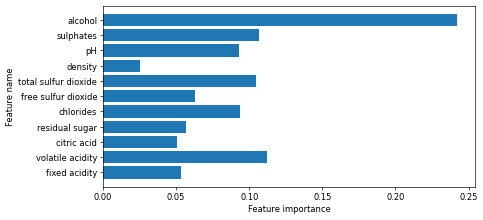

Feature importances: [0.05313854 0.11234301 0.0503035  0.05695755 0.09347698 0.06275887
 0.10440232 0.02523506 0.0926559  0.10644525 0.24228302]


In [594]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_wineRed_train, y_wineRed_train)

train_score = clf.score(X_wineRed_train, y_wineRed_train)
test_score = clf.score(X_wineRed_test, y_wineRed_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

plt.figure(figsize=(8,4), dpi=60)

# import features (call the function above)
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
plot_feature_importances(clf, features)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### k-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def KNNClassifier(X_train, X_test, y_train, y_test, NumNeigbors):
    KNNClassifier = KNeighborsClassifier(n_neighbors = NumNeigbors)
    KNNClassifier.fit(X_train, y_train)
    return KNNClassifier

In [595]:
# def ResultScoreTestSize(setCriterion_):
    
class_reports_white = []
class_reports_red = []
categorical_names_white = wineWhite["Categorical Quality"].unique()
categorical_names_red = wineRed["Categorical Quality"].unique()



#    for i in [0.50, 0.40, 0.30, 0.20, 0.10]:  
X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, 
                                                                                            test_size=0.225)
X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, 
                                                                                            test_size=0.15)       
KnnClassifierWhite = KNNClassifier(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test, 56)
KnnClassifierRed = KNNClassifier(X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test, 12)


y_pred_white = KnnClassifierWhite.predict(X_wineWhite_test)
y_pred_red = KnnClassifierRed.predict(X_wineRed_test)
class_reports_white.append(classification_report(y_wineWhite_test, y_pred_white, target_names=categorical_names_white, output_dict=True))
class_reports_red.append(classification_report(y_wineRed_test, y_pred_red, target_names=categorical_names_red, output_dict=True))

#   return class_reports_white, class_reports_red, y_pred_white, y_pred_red   

In [596]:
from sklearn.metrics import confusion_matrix

def PrintResultScoreTestSize():
    accuracy_score_white = []
    accuracy_score_red = []
  
    accuracy_score_white.append(class_reports_white[0]['accuracy'])
    accuracy_score_red.append(class_reports_red[0]['accuracy'])
    
    # Confusion Matrix
    print('Confusion Matrix White')
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_wineWhite_test, y_pred_white)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_white = classification_report(y_wineWhite_test, y_pred_white, target_names=target_names, output_dict=False)
    print(result_white)
    print("accuracy score for white wine: ", accuracy_score_white[0])
    
    
    # Confusion Matrix
    
    # plot a confusion matrix
    print()
    print('Confusion Matrix Red')
    confusion_mat = confusion_matrix(y_wineRed_test, y_pred_red)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_red = classification_report(y_wineRed_test, y_pred_red, target_names=target_names, output_dict=False)
    print(result_red)
    print("accuracy score for red wine: ", accuracy_score_red[0])

Confusion Matrix White
[[535   0  64]
 [ 26   0   6]
 [217   0  44]]


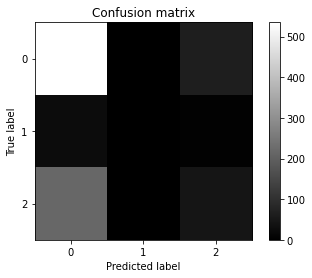

              precision    recall  f1-score   support

         Low       0.69      0.89      0.78       599
      Medium       0.00      0.00      0.00        32
        High       0.39      0.17      0.23       261

    accuracy                           0.65       892
   macro avg       0.36      0.35      0.34       892
weighted avg       0.57      0.65      0.59       892

accuracy score for white wine:  0.649103139013453

Confusion Matrix Red
[[80  0 33]
 [ 4  0  3]
 [34  0 50]]


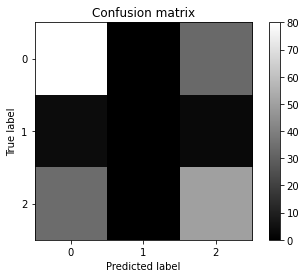

              precision    recall  f1-score   support

         Low       0.68      0.71      0.69       113
      Medium       0.00      0.00      0.00         7
        High       0.58      0.60      0.59        84

    accuracy                           0.64       204
   macro avg       0.42      0.43      0.43       204
weighted avg       0.61      0.64      0.63       204

accuracy score for red wine:  0.6372549019607843


In [597]:
PrintResultScoreTestSize()

Accuracy =  0.2962901764601982


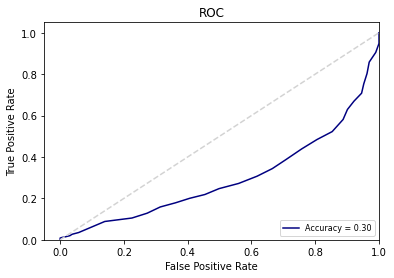

In [598]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_white = KnnClassifierWhite.predict_proba(X_wineWhite_test)

y_test = label_binarize(y_wineWhite_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_white, true_positive_rate_white, thresholds = roc_curve(y_test[:, i] , y_score_white[:, i])

roc_auc_white = auc(false_positive_rate_white, true_positive_rate_white)
print('Accuracy = ', roc_auc_white)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_white, true_positive_rate_white, c=color, label=('Accuracy = %0.2f'%roc_auc_white))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy =  0.3109501118350676


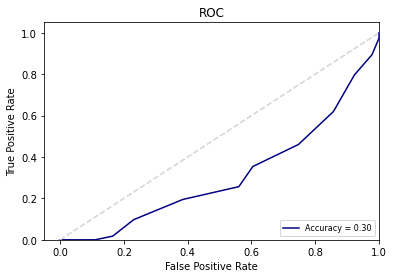

In [599]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_red = KnnClassifierRed.predict_proba(X_wineRed_test)

y_test = label_binarize(y_wineRed_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_red, true_positive_rate_red, thresholds = roc_curve(y_test[:, i] , y_score_red[:, i])

roc_auc_red = auc(false_positive_rate_red, true_positive_rate_red)
print('Accuracy = ', roc_auc_red)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_red, true_positive_rate_red, c=color, label=('Accuracy = %0.2f'%roc_auc_white))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naïve Bayes classifier

In [600]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

In [601]:
def NaiveBayesClassifier(X_train, X_test, y_train, y_test):
    NBClassifier = GaussianNB().fit(X_train, y_train)
    return NBClassifier

In [602]:
# def ResultScoreTestSize(setCriterion_):
class_reports_white = []
class_reports_red = []
categorical_names_white = wineWhite["Categorical Quality"].unique()
categorical_names_red = wineRed["Categorical Quality"].unique()



#    for i in [0.50, 0.40, 0.30, 0.20, 0.10]:  
X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, 
                                                                                            test_size=0.225)
X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, 
                                                                                            test_size=0.15)       
NBClassifierWhite = NaiveBayesClassifier(X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test)
NBClassifierRed = NaiveBayesClassifier(X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test)


y_pred_white = NBClassifierWhite.predict(X_wineWhite_test)
y_pred_red = NBClassifierRed.predict(X_wineRed_test)
class_reports_white.append(classification_report(y_wineWhite_test, y_pred_white, target_names=categorical_names_white, output_dict=True))
class_reports_red.append(classification_report(y_wineRed_test, y_pred_red, target_names=categorical_names_red, output_dict=True))

#   return class_reports_white, class_reports_red, y_pred_white, y_pred_red   

In [603]:
from sklearn.metrics import confusion_matrix

def PrintResultScoreTestSize():
    accuracy_score_white = []
    accuracy_score_red = []
  
    accuracy_score_white.append(class_reports_white[0]['accuracy'])
    accuracy_score_red.append(class_reports_red[0]['accuracy'])
    
    # Confusion Matrix
    print('Confusion Matrix White')
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_wineWhite_test, y_pred_white)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_white = classification_report(y_wineWhite_test, y_pred_white, target_names=target_names, output_dict=False)
    print(result_white)
    print("accuracy score for white wine: ", accuracy_score_white[0])
    
    # Confusion Matrix
    print()
    print('Confusion Matrix Red')
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_wineRed_test, y_pred_red)
    print(confusion_mat)
    plot_confusion_matrix(confusion_mat, 3)
    
    # Performance results summary
    #print(class_reports_white)
    
    target_names = ['Low', 'Medium', 'High']
    result_Red = classification_report(y_wineRed_test, y_pred_red, target_names=target_names, output_dict=False)
    print(result_Red)
    print("accuracy score for red wine: ", accuracy_score_white[0])

Confusion Matrix White
[[477   5 109]
 [ 12   8   9]
 [127   8 137]]


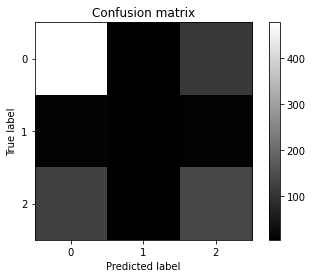

              precision    recall  f1-score   support

         Low       0.77      0.81      0.79       591
      Medium       0.38      0.28      0.32        29
        High       0.54      0.50      0.52       272

    accuracy                           0.70       892
   macro avg       0.56      0.53      0.54       892
weighted avg       0.69      0.70      0.69       892

accuracy score for white wine:  0.6973094170403588

Confusion Matrix Red
[[74  1 31]
 [ 3  1  7]
 [23  5 59]]


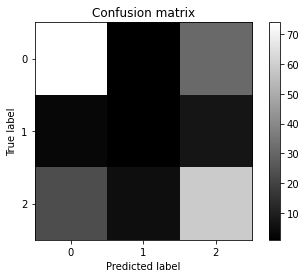

              precision    recall  f1-score   support

         Low       0.74      0.70      0.72       106
      Medium       0.14      0.09      0.11        11
        High       0.61      0.68      0.64        87

    accuracy                           0.66       204
   macro avg       0.50      0.49      0.49       204
weighted avg       0.65      0.66      0.65       204

accuracy score for red wine:  0.6973094170403588


In [604]:
PrintResultScoreTestSize()

Accuracy =  0.25362722116352143


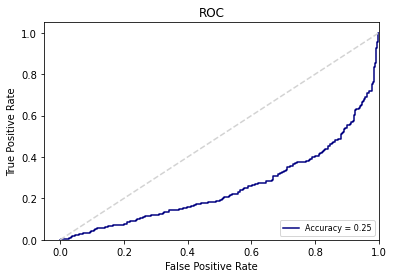

In [605]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_white = NBClassifierWhite.predict_proba(X_wineWhite_test)

y_test = label_binarize(y_wineWhite_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_white, true_positive_rate_white, thresholds = roc_curve(y_test[:, i] , y_score_white[:, i])

roc_auc_white = auc(false_positive_rate_white, true_positive_rate_white)
print('Accuracy = ', roc_auc_white)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_white, true_positive_rate_white, c=color, label=('Accuracy = %0.2f'%roc_auc_white))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy =  0.23998844820947246


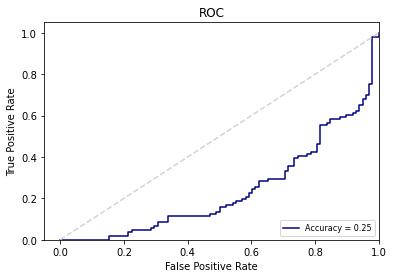

In [606]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score_red = NBClassifierRed.predict_proba(X_wineRed_test)

y_test = label_binarize(y_wineRed_test, classes=["Low", "Medium", "High"])
n_classes = y_test.shape[1]

for i in range(n_classes):
    false_positive_rate_red, true_positive_rate_red, threshold = roc_curve(y_test[:, i] , y_score_red[:, i])

roc_auc_red = auc(false_positive_rate_red, true_positive_rate_red)
print('Accuracy = ', roc_auc_red)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_red, true_positive_rate_red, c=color, label=('Accuracy = %0.2f'%roc_auc_white))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()